# <u>**TO BUILD Machine Learning Models**


from google.colab import drive
drive.mount('/content/drive')
# %cd 

%cd /content/drive/MyDrive/bird

In [1]:
# improt libraries
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
# Libraries for models
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import scipy.stats as stats
from sklearn import metrics
from matplotlib import pylab
import matplotlib.cm as cm
from sklearn.metrics import RocCurveDisplay
from pandas.api.types import is_string_dtype, is_numeric_dtype
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Q1: 4 or 5 specie that have at least 100 recordings which are consistent in length like 50seconds?

# Reading and loading the processed data/csv for this task

In [4]:
df = pd.read_csv('Processed Birds Data.csv')
df.head(5)

id     gen         sp  ssp                    en            rec  \
0  587992  Tetrao  urogallus  NaN  Western Capercaillie  Simon Elliott   
1  473721  Tetrao  urogallus  NaN  Western Capercaillie    Simon Ernst   
2  473720  Tetrao  urogallus  NaN  Western Capercaillie    Simon Ernst   
3  473716  Tetrao  urogallus  NaN  Western Capercaillie    Simon Ernst   
4  473711  Tetrao  urogallus  NaN  Western Capercaillie    Simon Ernst   

              cnt                                              loc      lat  \
0  United Kingdom       Great Britain, Perth and Kinross, Scotland  56.4117   
1  United Kingdom  Great Britain (near  Dunphail), Moray, Scotland  57.5173   
2  United Kingdom  Great Britain (near  Dunphail), Moray, Scotland  57.5173   
3  United Kingdom  Great Britain (near  Dunphail), Moray, Scotland  57.5173   
4  United Kingdom  Great Britain (near  Dunphail), Moray, Scotland  57.5173   

      lng  alt               type                      url  \
0 -3.6589  130  adult, male, song  //xeno-canto.org/587992   
1 -3.6848  160         male, song  //xeno-canto.org/473721   
2 -3.6848  160         call, male  //xeno-canto.org/473720   
3 -3.6848  160   call, male, song  //xeno-canto.org/473716   
4 -3.6848  160         male, song  //xeno-canto.org/473711   

                                     file                         file-name  \
0  https://xeno-canto.org/587992/download               XC587992-Cap-07.mp3   
1  https://xeno-canto.org/473721/download           XC473721-caper song.mp3   
2  https://xeno-canto.org/473720/download           XC473720-caper call.mp3   
3  https://xeno-canto.org/473716/download  XC473716-caper call and song.mp3   
4  https://xeno-canto.org/473711/download          XC473711-190512_0089.MP3   

                                                sono  \
0  {'small': '//xeno-canto.org/sounds/uploaded/FF...   
1  {'small': '//xeno-canto.org/sounds/uploaded/AS...   
2  {'small': '//xeno-canto.org/sounds/uploaded/AS...   
3  {'small': '//xeno-canto.org/sounds/uploaded/AS...   
4  {'small': '//xeno-canto.org/sounds/uploaded/AS...   

                                            lic  q length   time        date  \
0  //creativecommons.org/licenses/by-nc-nd/4.0/  A   2:32  06:30  1991-04-04   
1  //creativecommons.org/licenses/by-nc-sa/4.0/  A   0:06  10:30  2019-05-12   
2  //creativecommons.org/licenses/by-nc-sa/4.0/  A   0:09  10:30  2019-05-12   
3  //creativecommons.org/licenses/by-nc-sa/4.0/  A   0:10  10:30  2019-05-12   
4  //creativecommons.org/licenses/by-nc-sa/4.0/  A   1:11  10:30  2019-05-12   

     uploaded                                            also  \
0  2020-09-12                                             NaN   
1  2019-05-12                                             NaN   
2  2019-05-12                                             NaN   
3  2019-05-12                     ['Troglodytes troglodytes']   
4  2019-05-12  ['Regulus regulus', 'Troglodytes troglodytes']   

                                                 rmk bird-seen playback-used  \
0               male display;very close, touches mic       yes            no   
1  Not the exactly location, in way to preserve t...       yes            no   
2  Not the exactly location, in way to preserve t...       yes            no   
3  Not the exactly location, in way to preserve t...       yes            no   
4  Not the exactly location, in way to preserve t...       yes            no   

   year  month  day_of_month  hour        session   country iso_alpha weather  
0  1991      4             4     6  Early Morning  Scotland        GB  Spring  
1  2019      5            12    10        Morning  Scotland        GB  Spring  
2  2019      5            12    10        Morning  Scotland        GB  Spring  
3  2019      5            12    10        Morning  Scotland        GB  Spring  
4  2019      5            12    10        Morning  Scotland        GB  Spring

We are filtered the data from 50 sec and above. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46439 entries, 0 to 46438
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             46439 non-null  int64  
 1   gen            46439 non-null  object 
 2   sp             46439 non-null  object 
 3   ssp            13109 non-null  object 
 4   en             46439 non-null  object 
 5   rec            46439 non-null  object 
 6   cnt            46439 non-null  object 
 7   loc            46439 non-null  object 
 8   lat            46439 non-null  float64
 9   lng            46439 non-null  float64
 10  alt            46240 non-null  object 
 11  type           46423 non-null  object 
 12  url            46439 non-null  object 
 13  file           46438 non-null  object 
 14  file-name      46438 non-null  object 
 15  sono           46439 non-null  object 
 16  lic            46439 non-null  object 
 17  q              46439 non-null  object 
 18  length

## Data Filtering

In [6]:
df['length'] = df['length'].astype(str)

In [7]:
mask = (df['length'] >= "0:50") 
df_len = df.loc[mask]

In [8]:
df_len

id      gen         sp  ssp                    en  \
0      587992   Tetrao  urogallus  NaN  Western Capercaillie   
4      473711   Tetrao  urogallus  NaN  Western Capercaillie   
6      437466   Tetrao  urogallus  NaN  Western Capercaillie   
7      437465   Tetrao  urogallus  NaN  Western Capercaillie   
8      437462   Tetrao  urogallus  NaN  Western Capercaillie   
...       ...      ...        ...  ...                   ...   
46417  438056  Mystery    mystery  NaN      Identity unknown   
46427  351359  Mystery    mystery  NaN      Identity unknown   
46431  308970  Mystery    mystery  NaN      Identity unknown   
46434  201517  Mystery    mystery  NaN      Identity unknown   
46438  101012  Mystery    mystery  NaN      Identity unknown   

                     rec             cnt  \
0          Simon Elliott  United Kingdom   
4            Simon Ernst  United Kingdom   
6        Carlos Abrahams  United Kingdom   
7        Carlos Abrahams  United Kingdom   
8        Carlos Abrahams  United Kingdom   
...                  ...             ...   
46417  Martin Sutherland  United Kingdom   
46427            david m  United Kingdom   
46431        GRAEME REED  United Kingdom   
46434       Steve Pogson  United Kingdom   
46438               Mike  United Kingdom   

                                                     loc        lat       lng  \
0             Great Britain, Perth and Kinross, Scotland  56.411700 -3.658900   
4        Great Britain (near  Dunphail), Moray, Scotland  57.517300 -3.684800   
6                       Nethy Bridge, Highland, Scotland  57.263600 -3.654100   
7                       Nethy Bridge, Highland, Scotland  57.263600 -3.654100   
8                       Nethy Bridge, Highland, Scotland  57.263600 -3.654100   
...                                                  ...        ...       ...   
46417                                 Sandwich Bay, Kent  51.258700  1.388100   
46427  Ryedale District (near  Helperthorpe), North Y...  54.124400 -0.552900   
46431  South Cambridgeshire District (near  Stow cum ...  52.212000  0.215200   
46434  Metropolitan Borough of Kirklees (near  Linthw...  53.618200 -1.855300   
46438                                 doncaster, england  53.554169 -1.392776   

       alt               type                      url  \
0      130  adult, male, song  //xeno-canto.org/587992   
4      160         male, song  //xeno-canto.org/473711   
6      220         male, song  //xeno-canto.org/437466   
7      220         male, song  //xeno-canto.org/437465   
8      220         male, song  //xeno-canto.org/437462   
...    ...                ...                      ...   
46417    0               call  //xeno-canto.org/438056   
46427   90               call  //xeno-canto.org/351359   
46431   10               song  //xeno-canto.org/308970   
46434  190      song, subsong  //xeno-canto.org/201517   
46438   10         call, song  //xeno-canto.org/101012   

                                         file  \
0      https://xeno-canto.org/587992/download   
4      https://xeno-canto.org/473711/download   
6      https://xeno-canto.org/437466/download   
7      https://xeno-canto.org/437465/download   
8      https://xeno-canto.org/437462/download   
...                                       ...   
46417  https://xeno-canto.org/438056/download   
46427  https://xeno-canto.org/351359/download   
46431  https://xeno-canto.org/308970/download   
46434  https://xeno-canto.org/201517/download   
46438  https://xeno-canto.org/101012/download   

                                               file-name  \
0                                    XC587992-Cap-07.mp3   
4                               XC473711-190512_0089.MP3   
6                     XC437466-160424_Capercaillie 3.mp3   
7                     XC437465-160424_Capercaillie 2.mp3   
8                     XC437462-160424_Capercaillie 1.mp3   
...                                                  ...   
46417  XC438056-Species unidentifi

# Graph Visulization

In [9]:
fig = go.Figure(data=[
    go.Bar(y=df_len.time,x=df_len.sp,marker_color='deeppink')
])
fig.update_layout(title="Distribution of Bird Species on the basis of Time",
    xaxis_title="Species",
    yaxis_title="Time",)
fig.show()

In [12]:
temp = df_len.sp.value_counts()>1000
df_len=df_len[df_len['sp'].isin(temp[temp].index.get_level_values(0).values)]

In [13]:
import plotly.graph_objects as go
fig = go.Figure(data=[
    go.Bar(y=df_len.time,x=df_len.sp,marker_color='red')
])
fig.update_layout(title="Top 4 Species that sings Have More than 0:50 Second of Times",
    xaxis_title="Species",
    yaxis_title="Time",)
fig.show()

# Q2: Build an algorithm to process 6 month worth of data. To do that, work predominantly on some kind of ML algorithm that has now been?

In [14]:
# reading data file
df = pd.read_csv('Processed Birds Data.csv')
df.head(5)

id     gen         sp  ssp                    en            rec  \
0  587992  Tetrao  urogallus  NaN  Western Capercaillie  Simon Elliott   
1  473721  Tetrao  urogallus  NaN  Western Capercaillie    Simon Ernst   
2  473720  Tetrao  urogallus  NaN  Western Capercaillie    Simon Ernst   
3  473716  Tetrao  urogallus  NaN  Western Capercaillie    Simon Ernst   
4  473711  Tetrao  urogallus  NaN  Western Capercaillie    Simon Ernst   

              cnt                                              loc      lat  \
0  United Kingdom       Great Britain, Perth and Kinross, Scotland  56.4117   
1  United Kingdom  Great Britain (near  Dunphail), Moray, Scotland  57.5173   
2  United Kingdom  Great Britain (near  Dunphail), Moray, Scotland  57.5173   
3  United Kingdom  Great Britain (near  Dunphail), Moray, Scotland  57.5173   
4  United Kingdom  Great Britain (near  Dunphail), Moray, Scotland  57.5173   

      lng  alt               type                      url  \
0 -3.6589  130  adult, male, song  //xeno-canto.org/587992   
1 -3.6848  160         male, song  //xeno-canto.org/473721   
2 -3.6848  160         call, male  //xeno-canto.org/473720   
3 -3.6848  160   call, male, song  //xeno-canto.org/473716   
4 -3.6848  160         male, song  //xeno-canto.org/473711   

                                     file                         file-name  \
0  https://xeno-canto.org/587992/download               XC587992-Cap-07.mp3   
1  https://xeno-canto.org/473721/download           XC473721-caper song.mp3   
2  https://xeno-canto.org/473720/download           XC473720-caper call.mp3   
3  https://xeno-canto.org/473716/download  XC473716-caper call and song.mp3   
4  https://xeno-canto.org/473711/download          XC473711-190512_0089.MP3   

                                                sono  \
0  {'small': '//xeno-canto.org/sounds/uploaded/FF...   
1  {'small': '//xeno-canto.org/sounds/uploaded/AS...   
2  {'small': '//xeno-canto.org/sounds/uploaded/AS...   
3  {'small': '//xeno-canto.org/sounds/uploaded/AS...   
4  {'small': '//xeno-canto.org/sounds/uploaded/AS...   

                                            lic  q length   time        date  \
0  //creativecommons.org/licenses/by-nc-nd/4.0/  A   2:32  06:30  1991-04-04   
1  //creativecommons.org/licenses/by-nc-sa/4.0/  A   0:06  10:30  2019-05-12   
2  //creativecommons.org/licenses/by-nc-sa/4.0/  A   0:09  10:30  2019-05-12   
3  //creativecommons.org/licenses/by-nc-sa/4.0/  A   0:10  10:30  2019-05-12   
4  //creativecommons.org/licenses/by-nc-sa/4.0/  A   1:11  10:30  2019-05-12   

     uploaded                                            also  \
0  2020-09-12                                             NaN   
1  2019-05-12                                             NaN   
2  2019-05-12                                             NaN   
3  2019-05-12                     ['Troglodytes troglodytes']   
4  2019-05-12  ['Regulus regulus', 'Troglodytes troglodytes']   

                                                 rmk bird-seen playback-used  \
0               male display;very close, touches mic       yes            no   
1  Not the exactly location, in way to preserve t...       yes            no   
2  Not the exactly location, in way to preserve t...       yes            no   
3  Not the exactly location, in way to preserve t...       yes            no   
4  Not the exactly location, in way to preserve t...       yes            no   

   year  month  day_of_month  hour        session   country iso_alpha weather  
0  1991      4             4     6  Early Morning  Scotland        GB  Spring  
1  2019      5            12    10        Morning  Scotland        GB  Spring  
2  2019      5            12    10        Morning  Scotland        GB  Spring  
3  2019      5            12    10        Morning  Scotland        GB  Spring  
4  2019      5            12    10        Morning  Scotland        GB  Spring

### Finding most freqqunt upload in which year so we can extract the last six months of data with respect to most recording of species for that specific year

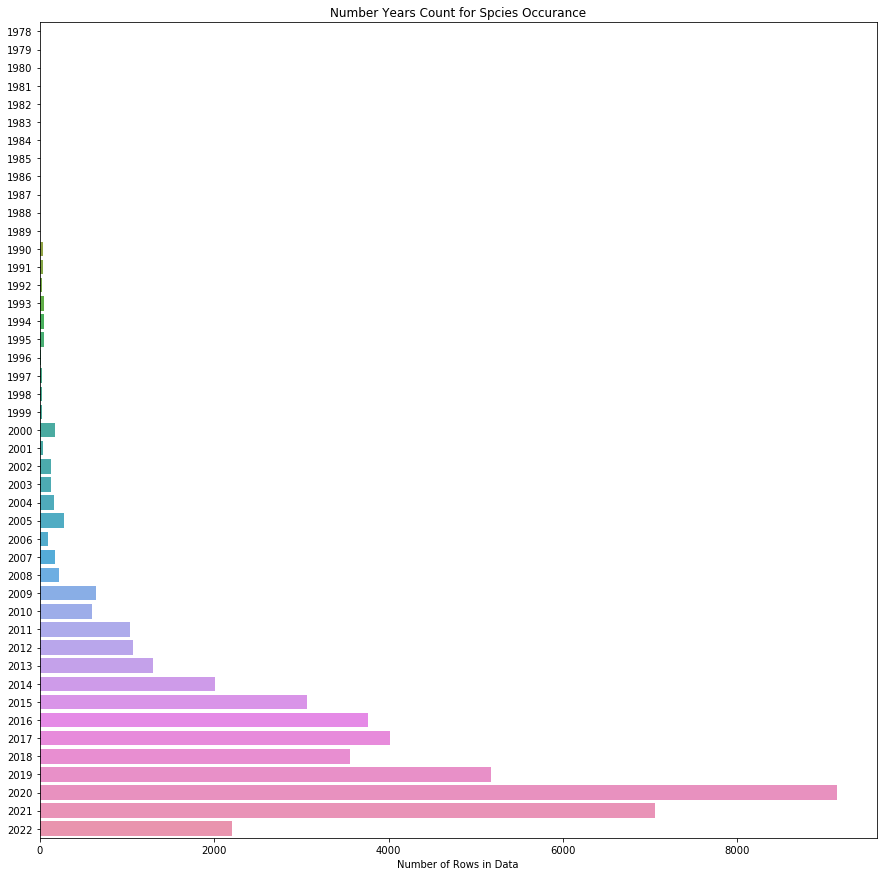

In [15]:
plt.figure(figsize = (15,15))
plt.title('Number Years Count for Spcies Occurance')
sns.countplot(y = 'year', data = df)
plt.xlabel('Number of Rows in Data')

plt.ylabel('')
plt.show()

### Re-adjusting the columns for dependent and independant variable

In [16]:
df = df[['id', 'gen', 'ssp', 'en', 'rec', 'cnt', 'loc', 'lat', 'lng',
       'alt', 'type', 'url', 'file', 'file-name', 'sono', 'lic', 'q', 'length',
       'time', 'date', 'uploaded', 'also', 'rmk', 'bird-seen', 'playback-used',
       'year', 'month', 'day_of_month', 'hour', 'session', 'country',
       'iso_alpha', 'weather', 'sp']]

In [17]:
# converting the type of data to string so we can easily search that specific year we find in above graph
df['date'] = df['date'].astype(str)

We are selecting the most entries for an year of 2020 and selecting six month data from 2020.

In [18]:
df[df['date'].str.contains('2020-01-01')].head(5)

id           gen          ssp                 en               rec  \
12653  515407          Pica         pica    Eurasian Magpie           david m   
13833  515401     Periparus  britannicus           Coal Tit           david m   
22928  552174  Phylloscopus          NaN  Common Chiffchaff  Theo de Clermont   
34803  515416        Passer   domesticus      House Sparrow           david m   
34804  515415        Passer   domesticus      House Sparrow           david m   

                  cnt                                                loc  \
12653  United Kingdom  Ryedale District ,(near Helperthorpe), North Y...   
13833  United Kingdom  Ryedale District ,(near Helperthorpe), North Y...   
22928  United Kingdom  Great Britain (near  Kites Hardwick), Warwicks...   
34803  United Kingdom  Ryedale District ,(near Helperthorpe), North Y...   
34804  United Kingdom  Ryedale District ,(near Helperthorpe), North Y...   

           lat     lng alt                                    type  \
12653  54.1200 -0.5445  80  adult, call, sex uncertain, wing beats   
13833  54.1200 -0.5445  80  adult, call, sex uncertain, wing beats   
22928  52.3088 -1.3115  70        call, life stage uncertain, song   
34803  54.1200 -0.5445  80  adult, call, sex uncertain, wing beats   
34804  54.1200 -0.5445  80  adult, call, sex uncertain, wing beats   

                           url                                    file  \
12653  //xeno-canto.org/515407  https://xeno-canto.org/515407/download   
13833  //xeno-canto.org/515401  https://xeno-canto.org/515401/download   
22928  //xeno-canto.org/552174  https://xeno-canto.org/552174/download   
34803  //xeno-canto.org/515416  https://xeno-canto.org/515416/download   
34804  //xeno-canto.org/515415  https://xeno-canto.org/515415/download   

                       file-name  \
12653    XC515407-MIXPRE-425.mp3   
13833    XC515401-MIXPRE-423.mp3   
22928  XC552174-Chiffchaff 1.mp3   
34803    XC515416-MIXPRE-430.mp3   
34804    XC515415-MIXPRE-429.mp3   

                                                    sono  \
12653  {'small': '//xeno-canto.org/sounds/uploaded/BT...   
13833  {'small': '//xeno-canto.org/sounds/uploaded/BT...   
22928  {'small': '//xeno-canto.org/sounds/uploaded/JK...   
34803  {'small': '//xeno-canto.org/sounds/uploaded/BT...   
34804  {'small': '//xeno-canto.org/sounds/uploaded/BT...   

                                                lic  q length   time  \
12653  //creativecommons.org/licenses/by-nc-nd/4.0/  D   3:03  08:35   
13833  //creativecommons.org/licenses/by-nc-nd/4.0/  C   1:22  08:28   
22928  //creativecommons.org/licenses/by-nc-sa/4.0/  C   0:06  06:00   
34803  //creativecommons.org/licenses/by-nc-nd/4.0/  C   0:43  09:03   
34804  //creativecommons.org/licenses/by-nc-nd/4.0/  C   1:49  09:00   

             date    uploaded  \
12653  2020-01-01  2020-01-02   
13833  2020-01-01  2020-01-02   
22928  2020-01-01  2020-04-29   
34803  2020-01-01  2020-01-02   
34804  2020-01-01  2020-01-02   

                                                    also  \
12653  ['Streptopelia decaocto', 'Erithacus rubecula'...   
13833  ['Streptopelia decaocto', 'Turdus iliacus', 'T...   
22928                                                NaN   
34803  ['Streptopelia decaocto', 'Parus major', 'Prun...   
34804  ['Corvus frugilegus', 'Streptopelia decaocto',...   

                                                     rmk bird-seen  \
12653  Magpie call ... SASS ... not filtered ... back...        no   
13833  Coal tit call ... SASS ... not filtered ... ba...        no   
22928                             During the dawn chorus        no   
34803  House sparrow call ... SASS ... not filtered ....        no   
34804  House sparrow call ... SASS ... not filtered ....        no   

      playback-used  year  month  day_of_month  hour        session  country  \
12653            no  2020      1             1     8  Early Morning  England   
13833            no  2020      1             1   

In [19]:
# first create the location based os boolean values like create mask and than update that mask on orignal dataframe values
# extract that 6 months data.
mask = (df['date'] > '2020-01-01') & (df['date'] <= '2020-06-30')

len(df.loc[mask])
df_six_month = df.loc[mask]

In [20]:
df_six_month.head()

id        gen  ssp                    en      rec             cnt  \
90  607653  Alectoris  NaN  Red-legged Partridge  david m  United Kingdom   
91  604114  Alectoris  NaN  Red-legged Partridge  david m  United Kingdom   
92  594820  Alectoris  NaN  Red-legged Partridge  david m  United Kingdom   
93  590256  Alectoris  NaN  Red-legged Partridge  david m  United Kingdom   
94  588076  Alectoris  NaN  Red-legged Partridge  david m  United Kingdom   

                                                  loc      lat     lng  alt  \
90  Ryedale District,(near Helperthorpe), North Yo...  54.1247 -0.5453   80   
91  Ryedale District, (near West Lutton), North Yo...  54.1243 -0.5603   90   
92  Ryedale District (near Helperthorpe), North Yo...  54.1247 -0.5453   80   
93  Ryedale District (near West Lutton), North Yor...  54.1243 -0.5627  100   
94  Ryedale District (near West Lutton), North Yor...  54.1246 -0.5699  100   

                                      type                      url  \
90              adult, call, sex uncertain  //xeno-canto.org/607653   
91  adult, call, sex uncertain, wing beats  //xeno-canto.org/604114   
92              adult, call, sex uncertain  //xeno-canto.org/594820   
93              adult, call, sex uncertain  //xeno-canto.org/590256   
94                       adult, call, male  //xeno-canto.org/588076   

                                      file                 file-name  \
90  https://xeno-canto.org/607653/download  XC607653-MIXPRE-3434.mp3   
91  https://xeno-canto.org/604114/download  XC604114-MIXPRE-3103.mp3   
92  https://xeno-canto.org/594820/download  XC594820-MIXPRE-2421.mp3   
93  https://xeno-canto.org/590256/download  XC590256-MIXPRE-1886.mp3   
94  https://xeno-canto.org/588076/download  XC588076-MIXPRE-1797.mp3   

                                                 sono  \
90  {'small': '//xeno-canto.org/sounds/uploaded/BT...   
91  {'small': '//xeno-canto.org/sounds/uploaded/BT...   
92  {'small': '//xeno-canto.org/sounds/uploaded/BT...   
93  {'small': '//xeno-canto.org/sounds/uploaded/BT...   
94  {'small': '//xeno-canto.org/sounds/uploaded/BT...   

                                             lic  q length   time        date  \
90  //creativecommons.org/licenses/by-nc-nd/4.0/  C   1:52  07:21  2020-06-08   
91  //creativecommons.org/licenses/by-nc-nd/4.0/  C   2:16  08:33  2020-05-21   
92  //creativecommons.org/licenses/by-nc-nd/4.0/  C   1:07  06:46  2020-04-25   
93  //creativecommons.org/licenses/by-nc-nd/4.0/  C   1:39  06:46  2020-04-11   
94  //creativecommons.org/licenses/by-nc-nd/4.0/  C   4:47  07:25  2020-04-05   

      uploaded                                               also  \
90  2020-12-08  ['Prunella modularis', 'Phylloscopus trochilus...   
91  2020-11-19  ['Troglodytes troglodytes', 'Corvus corone', '...   
92  2020-10-12  ['Phylloscopus trochilus', 'Troglodytes troglo...   
93  2020-09-22  ['Phasianus colchicus', 'Emberiza citrinella',...   
94  2020-09-12  ['Troglodytes troglodytes', 'Columba palumbus'...   

                                                  rmk bird-seen playback-used  \
90  Red-legged partridge call ... dpa 4060s in par...       yes            no   
91  Red-legged partridge call ... dpa 4060s in par...       yes            no   
92  Red-legged partridge call ... dpa 4060s in par...       yes            no   
93  Red-legged partridge call ... dpa 4060s in par...       yes            no   
94  Red-legged partridge territorial call ..? dpa ...       yes            no   

    year  month  day_of_month  hour        session  country iso_alpha weather  \
90  2020      6             8     7  Early Morning  England        GB  Summer   
91  2020      5            21     8  Early Morning  England        GB  Spring   
92  2020      4            25     6  Early Morning  England        GB  Spring   
93  2020      4            11     6  Early Morning  England        GB  Spring   
94  2020      4             5     7  Early Morning  England        GB  Sp

# Exploratory Data Analysis
We already processed this data but we will again do some preprocessing for our classification task and will feature selection method too.

In [21]:
# Droping non important features which are non significant in classification and have no impact on final output
drop = ['id', 'q', 'ssp','bird-seen', 'rmk', 'loc', 'url', 'file', 'file-name', 'sono', 'lic', 'uploaded', 'also',
        'rmk', 'iso_alpha', 'playback-used', 'cnt', 'type', 'date', 'weather', 'session', 'time', 'length']
df_six_month.drop(drop, axis=1, inplace=True)

In [23]:
df_six_month.columns

Index(['gen', 'en', 'rec', 'lat', 'lng', 'alt', 'year', 'month',
       'day_of_month', 'hour', 'country', 'sp'],
      dtype='object')

### Find most Frequent country for specific specie

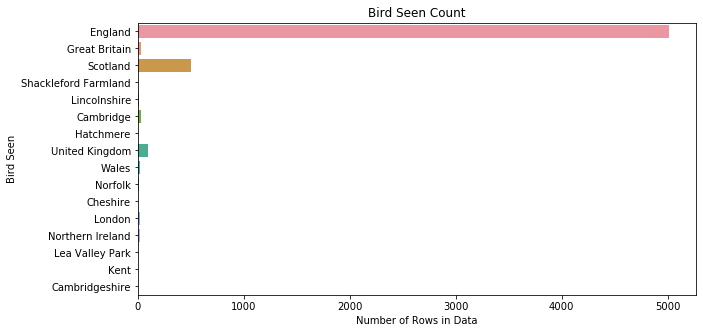

In [24]:
plt.figure(figsize = (10,5))
plt.title('Bird Seen Count')
sns.countplot(y = 'country', data = df_six_month)
plt.xlabel('Number of Rows in Data')
plt.ylabel('Bird Seen')
plt.show()

In [25]:
# we extract the data than we should find how many classes for this data like calculate independent variables
df_six_month.sp.nunique()

196

### we can see that we have 196 classes for last six months of data for the year of 2020 so we should check 
### check the distribution of the classes so we can see that if we have classes conflict than we should remove 
### first for further complication in modeling

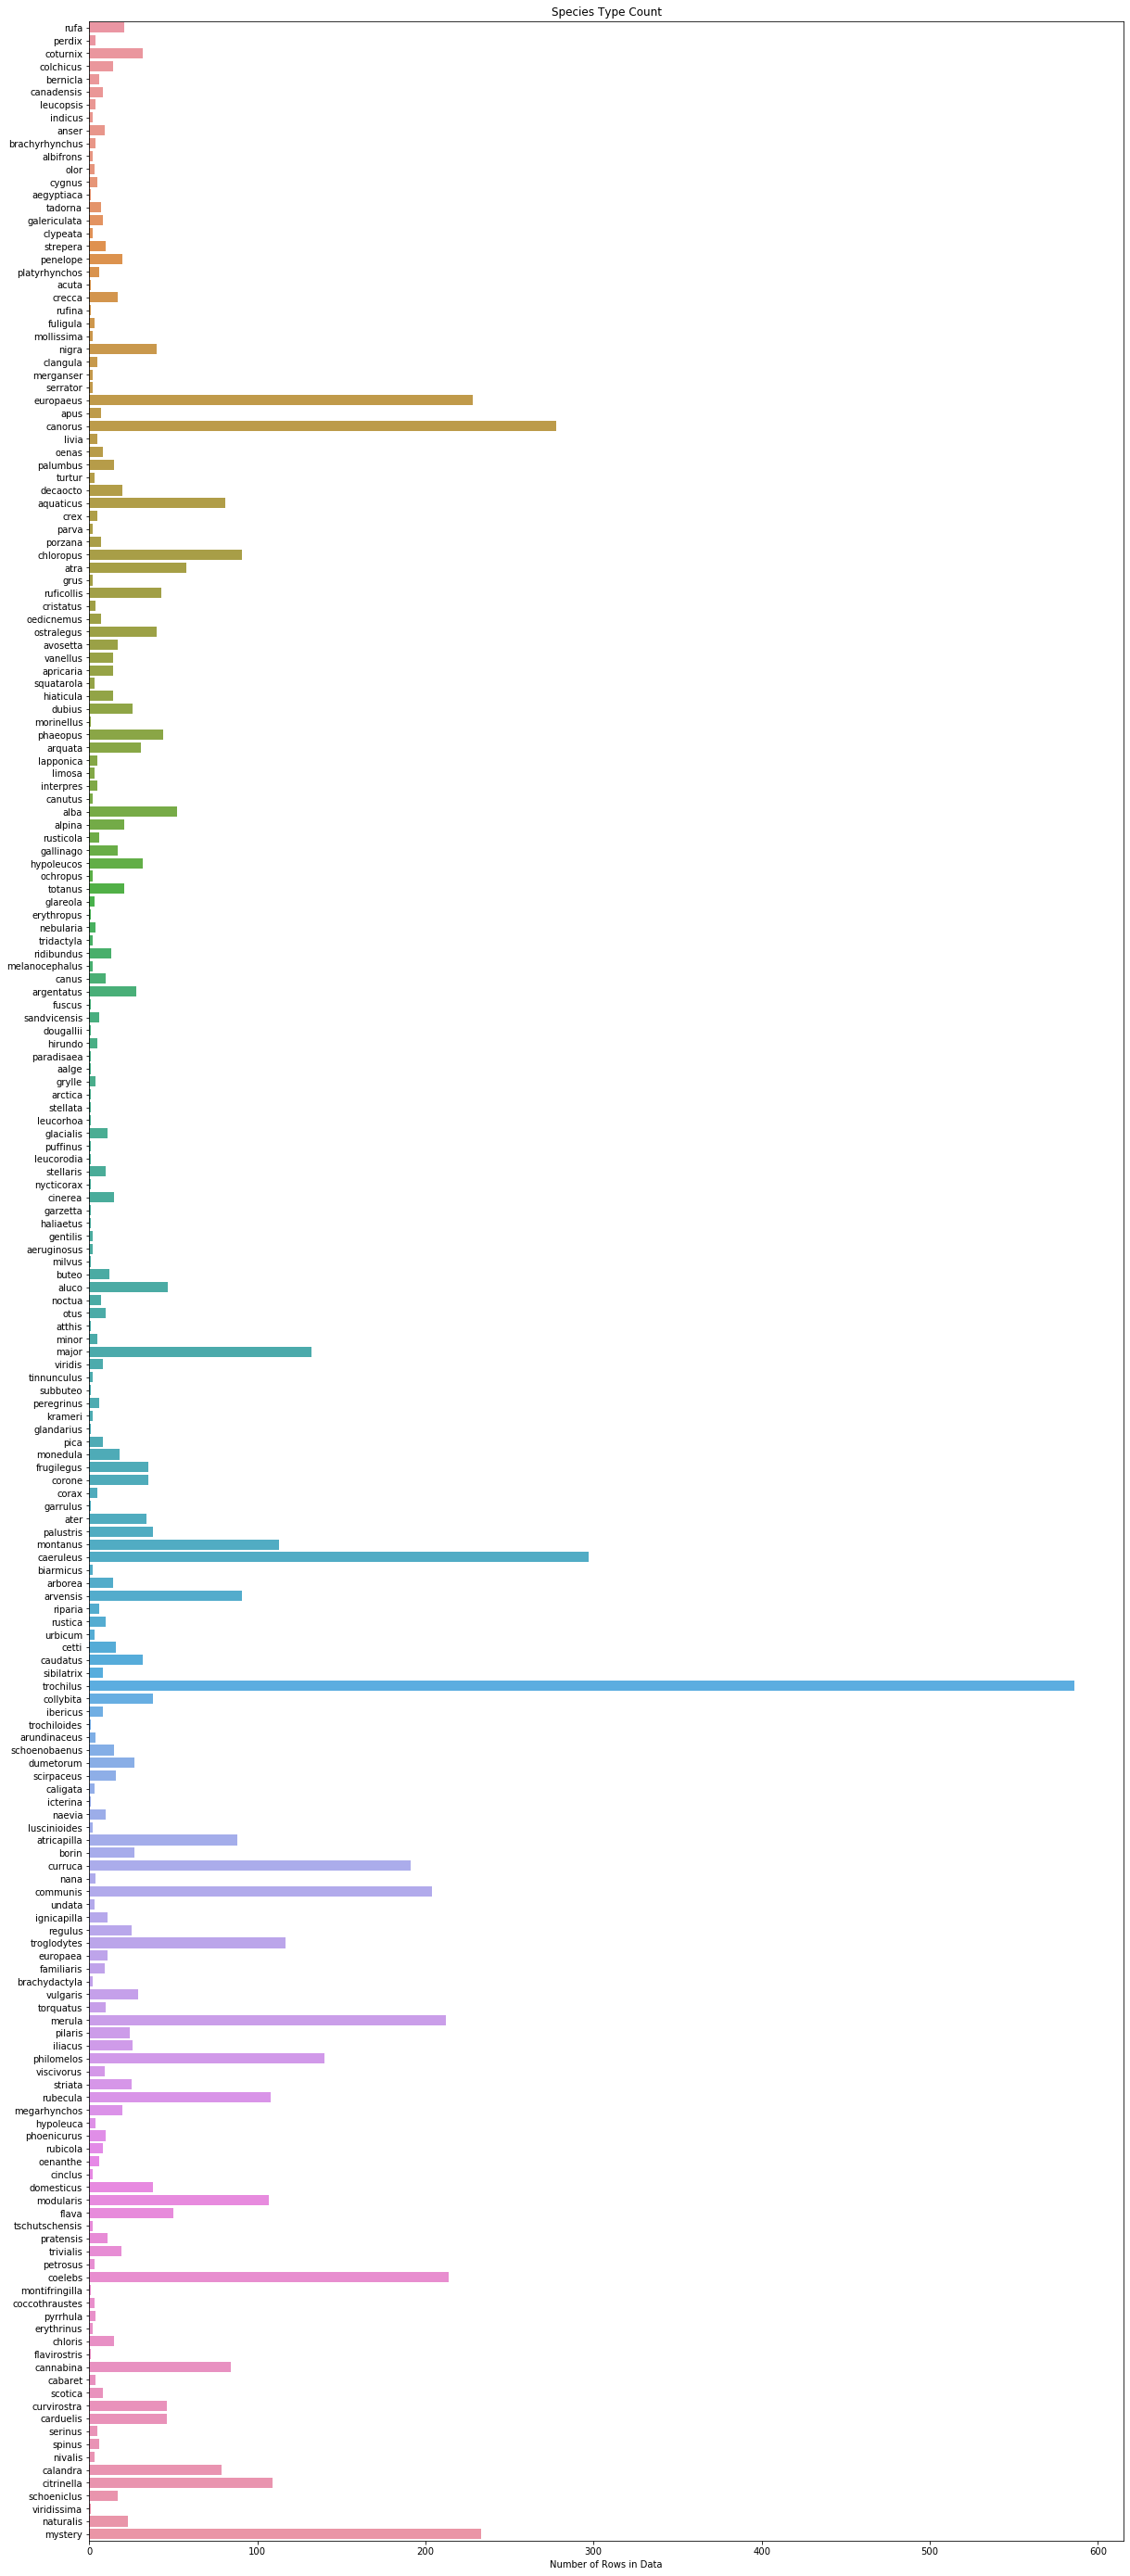

In [26]:
plt.figure(figsize = (20,50))
plt.title('Species Type Count')
sns.countplot(y = 'sp', data = df_six_month)
plt.xlabel('Number of Rows in Data')
plt.ylabel('')
plt.show()

As we see that our classess are very imblance so we will apply some selective sampling method to adjust the distribution of classes. For that we use the counter like we should remove all those classes which have 20 or less entry per classs so that we can overcome the class imblance and other complication in model.

# Remoing All those rows less than 20 samples or very low number of sample 

In [27]:
temp = df_six_month.sp.value_counts()>20
df_1=df_six_month[df_six_month['sp'].isin(temp[temp].index.get_level_values(0).values)]

In [28]:
# check number of remaining classes so that we should encode labels for standardization and other processing methods

In [30]:
df_1.sp.nunique()

55

As we see that from 196 classes we reduce it to 55 which means that we were having large number entries which have between range of **1** and **20**.

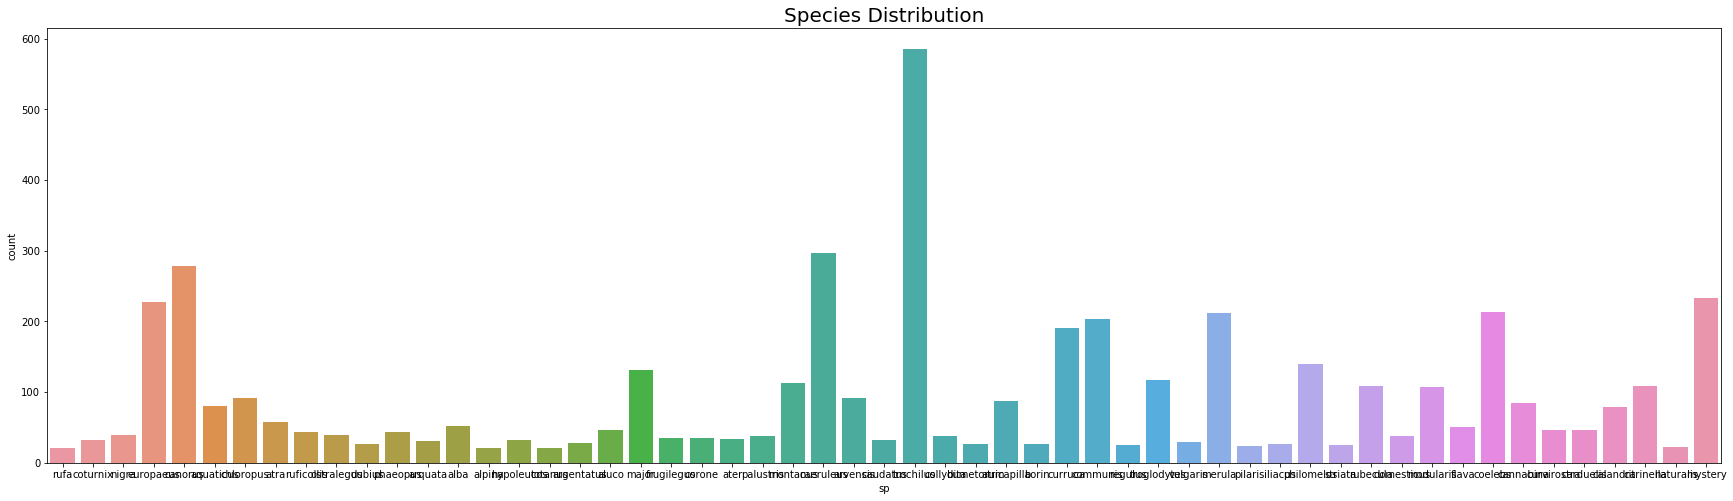

In [31]:
#Checking data imbalance and class distribution to check imbalnce classes to blance than by different methods
plt.figure(figsize=(30,8))
plt.title('Species Distribution', fontsize=20)
sns.countplot(x='sp', data = df_1)
plt.show()

# Checking for Null Value in the Columns if yes than remove it by just droping it.

In [32]:
# checking if there is any null value in the columns
df_1.dropna(inplace=True)

In [33]:
# Saving the data that we have cleaned and filtered from orignal data for future use
df_1.to_csv('Six Month Data.csv', index=False)

In [34]:
# droping nul values
df_1.isna().sum()

gen             0
en              0
rec             0
lat             0
lng             0
alt             0
year            0
month           0
day_of_month    0
hour            0
country         0
sp              0
dtype: int64

In [35]:
df_1['alt'] = df_1['alt'].astype(int)
df_1['year'] = df_1['year'].astype(float)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4913 entries, 90 to 46407
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gen           4913 non-null   object 
 1   en            4913 non-null   object 
 2   rec           4913 non-null   object 
 3   lat           4913 non-null   float64
 4   lng           4913 non-null   float64
 5   alt           4913 non-null   int32  
 6   year          4913 non-null   float64
 7   month         4913 non-null   int64  
 8   day_of_month  4913 non-null   int64  
 9   hour          4913 non-null   int64  
 10  country       4913 non-null   object 
 11  sp            4913 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 479.8+ KB


# Statistical description of numerical variables

In [36]:
df_1.describe()

lat          lng          alt    year        month  \
count  4913.000000  4913.000000  4913.000000  4913.0  4913.000000   
mean     53.807475    -1.051497    88.027885  2020.0     4.242215   
std       1.825977     1.660947    52.059047     0.0     1.339679   
min     -28.289900    -6.587600   -50.000000  2020.0     1.000000   
25%      52.877300    -1.392776    70.000000  2020.0     4.000000   
50%      54.122600    -0.547300    80.000000  2020.0     4.000000   
75%      54.125200    -0.542800   100.000000  2020.0     5.000000   
max      60.800100    86.005000   440.000000  2020.0     6.000000   

       day_of_month         hour  
count   4913.000000  4913.000000  
mean      16.091797     7.765317  
std        8.883035     5.536200  
min        0.000000     0.000000  
25%        8.000000     5.000000  
50%       17.000000     6.000000  
75%       24.000000     8.000000  
max       31.000000    23.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001591506F4E0>,
      dtype=object)

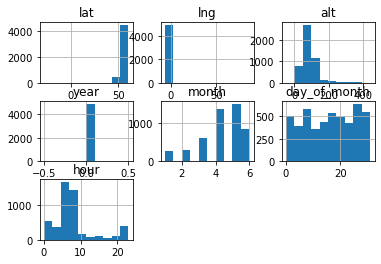

In [30]:
df_1.hist()

### Corelation of the different features of data for feature selection

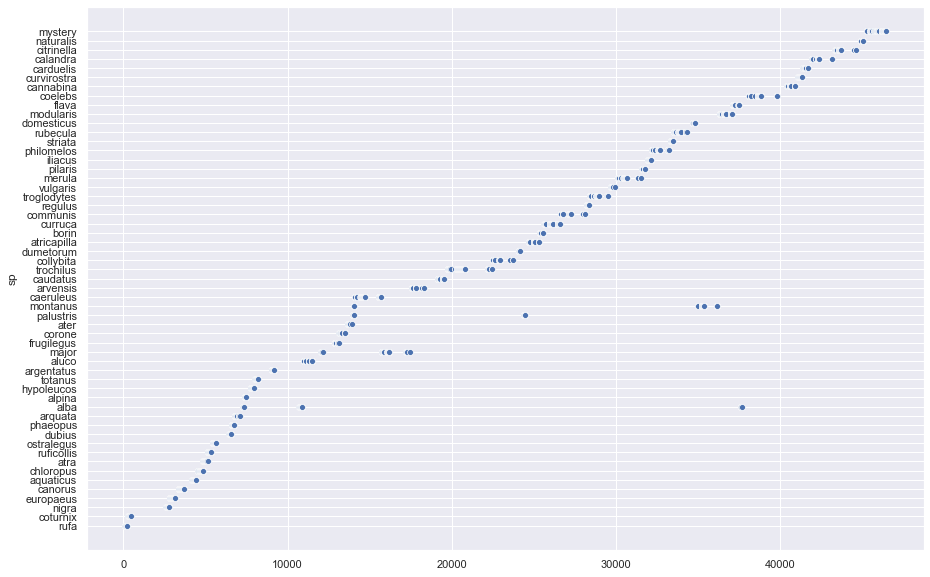

In [37]:
sns.set(rc={'figure.figsize':(15,10)})
sns.scatterplot(data=df_1, x=df_1.index, y='sp')

In [38]:
df_1.corr()

lat       lng       alt  year     month  day_of_month  \
lat           1.000000 -0.602040 -0.028790   NaN -0.027299     -0.007091   
lng          -0.602040  1.000000 -0.129397   NaN -0.130516     -0.011163   
alt          -0.028790 -0.129397  1.000000   NaN  0.040901      0.035417   
year               NaN       NaN       NaN   NaN       NaN           NaN   
month        -0.027299 -0.130516  0.040901   NaN  1.000000     -0.113391   
day_of_month -0.007091 -0.011163  0.035417   NaN -0.113391      1.000000   
hour         -0.025152 -0.096040 -0.009846   NaN  0.019661      0.015420   

                  hour  
lat          -0.025152  
lng          -0.096040  
alt          -0.009846  
year               NaN  
month         0.019661  
day_of_month  0.015420  
hour          1.000000

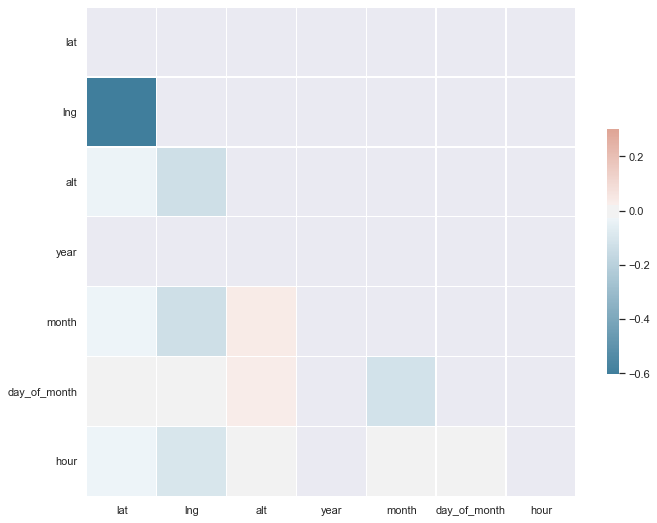

In [39]:
# Compute the correlation matrix for numeric features
corr = df_1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

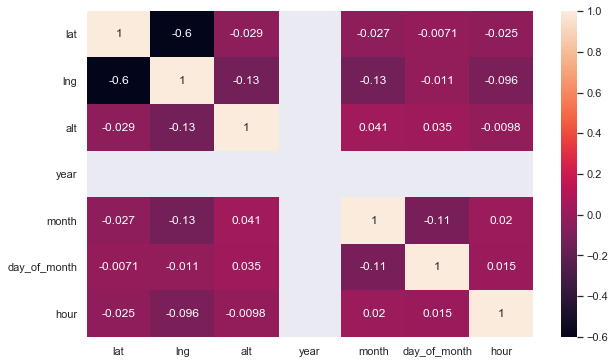

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_1.corr(), ax=ax, annot=True)

In [41]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4913 entries, 90 to 46407
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gen           4913 non-null   object 
 1   en            4913 non-null   object 
 2   rec           4913 non-null   object 
 3   lat           4913 non-null   float64
 4   lng           4913 non-null   float64
 5   alt           4913 non-null   int32  
 6   year          4913 non-null   float64
 7   month         4913 non-null   int64  
 8   day_of_month  4913 non-null   int64  
 9   hour          4913 non-null   int64  
 10  country       4913 non-null   object 
 11  sp            4913 non-null   object 
dtypes: float64(3), int32(1), int64(3), object(5)
memory usage: 479.8+ KB


In [42]:
df_1.columns

Index(['gen', 'en', 'rec', 'lat', 'lng', 'alt', 'year', 'month',
       'day_of_month', 'hour', 'country', 'sp'],
      dtype='object')

# Data Slicing Between dependent and independent variables

In [43]:
X = df_1[['gen', 'en', 'rec', 'lat', 'lng', 'alt',  'year', 'month',
       'day_of_month', 'hour', 'country',]]
y = df_1[['sp']]


Here we will convert all those columns for which we have non-numeric data so we can visulize the corelation and than standrize the values. Now we will label encode them.
We have use two method like one hot encoding and label encoding and we will use only one of them that is more sutiable for ML algorithms

In [38]:
df_X = X.copy()
df_X = pd.get_dummies(df_X, columns=['gen', 'en', 'rec',  'country'], prefix = ['gen', 'en', 'rec',  'country'])

df_X.head()

lat     lng  alt    year  month  day_of_month  hour  gen_Acrocephalus  \
90  54.1247 -0.5453   80  2020.0      6             8     7                 0   
91  54.1243 -0.5603   90  2020.0      5            21     8                 0   
92  54.1247 -0.5453   80  2020.0      4            25     6                 0   
93  54.1243 -0.5627  100  2020.0      4            11     6                 0   
94  54.1246 -0.5699  100  2020.0      4             5     7                 0   

    gen_Actitis  gen_Aegithalos  gen_Alauda  gen_Alectoris  gen_Calidris  \
90            0               0           0              1             0   
91            0               0           0              1             0   
92            0               0           0              1             0   
93            0               0           0              1             0   
94            0               0           0              1             0   

    gen_Caprimulgus  gen_Carduelis  gen_Charadrius  gen_Corvus  gen_Coturnix  \
90                0              0               0           0             0   
91                0              0               0           0             0   
92                0              0               0           0             0   
93                0              0               0           0             0   
94                0              0               0           0             0   

    gen_Cuculus  gen_Cyanistes  gen_Dendrocopos  gen_Emberiza  gen_Erithacus  \
90            0              0                0             0              0   
91            0              0                0             0              0   
92            0              0                0             0              0   
93            0              0                0             0              0   
94            0              0                0             0              0   

    gen_Fringilla  gen_Fulica  gen_Gallinula  gen_Haematopus  gen_Larus  \
90              0           0              0               0          0   
91              0           0              0               0          0   
92              0           0              0               0          0   
93              0           0              0               0          0   
94              0           0              0               0          0   

    gen_Linaria  gen_Loxia  gen_Melanitta  gen_Motacilla  gen_Muscicapa  \
90            0          0              0              0              0   
91            0          0              0              0              0   
92            0          0              0              0              0   
93            0          0              0              0              0   
94            0          0              0              0              0   

    gen_Mystery  gen_Numenius  gen_Parus  gen_Passer  gen_Periparus  \
90            0             0          0           0              0   
91            0             0          0           0              0   
92            0             0          0           0              0   
93            0             0          0           0              0   
94            0             0          0           0              0   

    gen_Phylloscopus  gen_Poecile  gen_Prunella  gen_Rallus  gen_Regulus  \
90                 0            0             0           0            0   
91                 0            0             0           0            0   
92                 0            0             0           0            0   
93                 0            0             0           0            0   
94                 0            0             0           0            0   

    gen_Sonus  gen_Strix  gen_Sturnus  gen_Sylvia  gen_Tachybaptus  \
90          0          0            0           0                0   
91          0          0            0           0                0   
92          0          0            0           0                0   
93          0          0            

# Y Label Encoding of Non_Numeric Features

In [44]:
le = preprocessing.LabelEncoder()
encoded_y = le.fit_transform(y)

decoded_y = le.inverse_transform(encoded_y)
decoded_y

array(['rufa', 'rufa', 'rufa', ..., 'mystery', 'mystery', 'mystery'],
      dtype=object)

In [45]:
encoded_y

array([48, 48, 48, ..., 38, 38, 38])

# X Features Encoding of Non_Numeric Features

In [46]:
!pip install sklearn-pandas

In [49]:
#!pip uninstall scikit-learn -y

!pip3 install scikit-learn 

  Using cached scikit_learn-1.0.2-cp37-cp37m-win_amd64.whl (7.1 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.6 which is incompatible.


In [47]:
#from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from collections import defaultdict


In [48]:
# selecting all non numeric column so to covert it into label encoder
X1 = df_1[['lat', 'lng', 'alt', 'year', 'month',
       'day_of_month', 'hour',]]
X2 = X[['gen', 'en', 'rec', 'country',]]


In [49]:
X2

gen                    en              rec  country
90     Alectoris  Red-legged Partridge          david m  England
91     Alectoris  Red-legged Partridge          david m  England
92     Alectoris  Red-legged Partridge          david m  England
93     Alectoris  Red-legged Partridge          david m  England
94     Alectoris  Red-legged Partridge          david m  England
...          ...                   ...              ...      ...
46401    Mystery      Identity unknown  Gareth Blockley  England
46403    Mystery      Identity unknown    James Spencer  England
46404    Mystery      Identity unknown        Ed Stubbs  England
46406    Mystery      Identity unknown       Will Scott  England
46407    Mystery      Identity unknown             Adam    Wales

[4913 rows x 4 columns]

In [46]:
# X3 = X2.apply(LabelEncoder().fit_transform)
# X3.head()

In [50]:
d = defaultdict(LabelEncoder)

In [51]:
# Encoding the variable
encode_X = X2.apply(lambda x: d[x.name].fit_transform(x))

# Inverse the encoded
decode_X = encode_X.apply(lambda x: d[x.name].inverse_transform(x))

# Using the dictionary to label future data
X2 = X2.apply(lambda x: d[x.name].transform(x))

In [52]:
X2 # so we encode the non numeric values to prcocess it again.

gen  en  rec  country
90       4  45  202        3
91       4  45  202        3
92       4  45  202        3
93       4  45  202        3
94       4  45  202        3
...    ...  ..  ...      ...
46401   26  37   66        3
46403   26  37   95        3
46404   26  37   59        3
46406   26  37  200        3
46407   26  37    0       14

[4913 rows x 4 columns]

In [53]:
print(len(X1))
print(len(X2))

4913
4913


In [54]:
X1.columns

Index(['lat', 'lng', 'alt', 'year', 'month', 'day_of_month', 'hour'], dtype='object')

In [55]:
df_X = pd.concat([X2, X1], axis="columns")

In [56]:
df_X.shape

(4913, 11)

### Find corelation between converted and overall columns

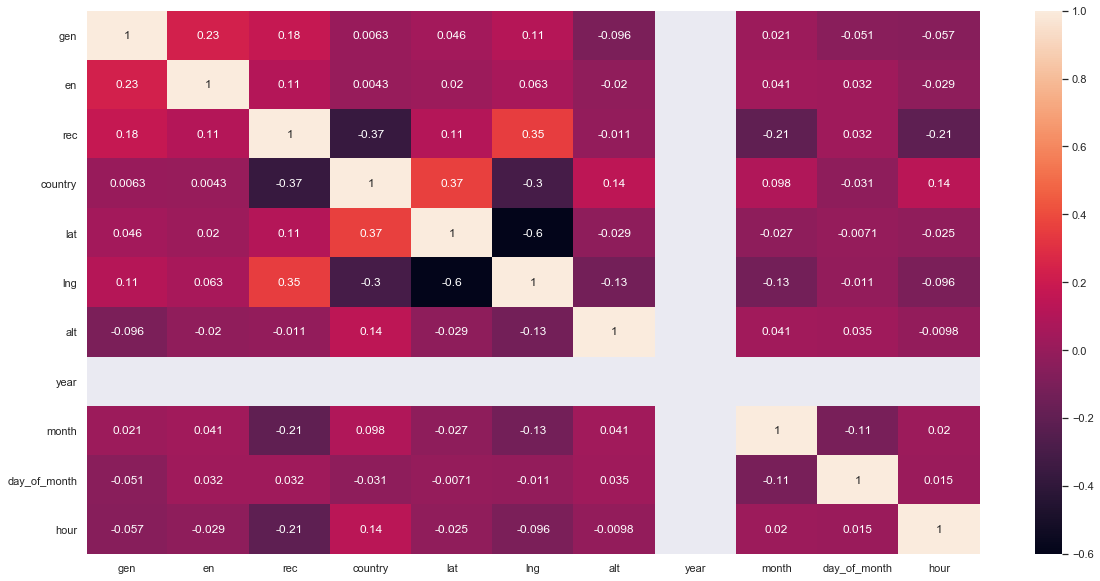

In [61]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.heatmap(df_X.corr(), ax=ax, annot=True)

In [55]:
## 2nd colors plot of correlation

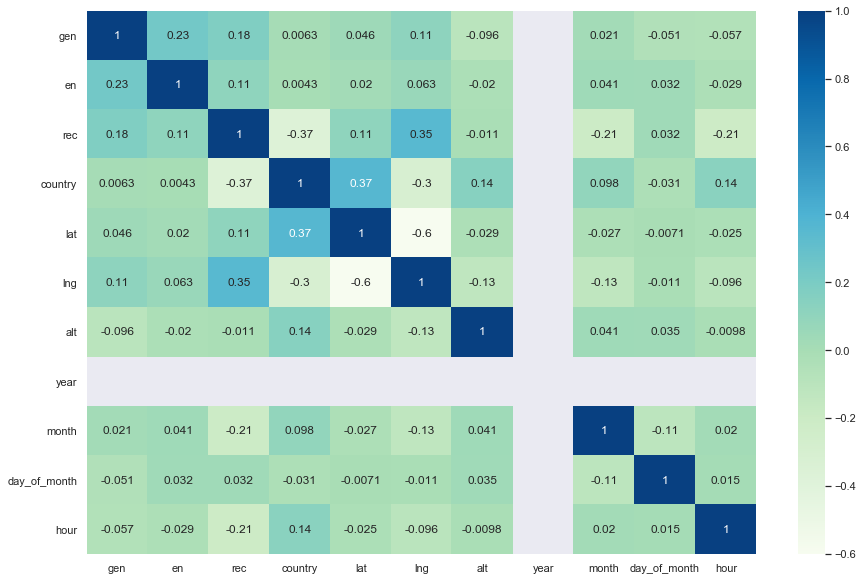

In [57]:
correlation = df_X.corr()
sns.heatmap(correlation, cmap = "GnBu", annot = True)

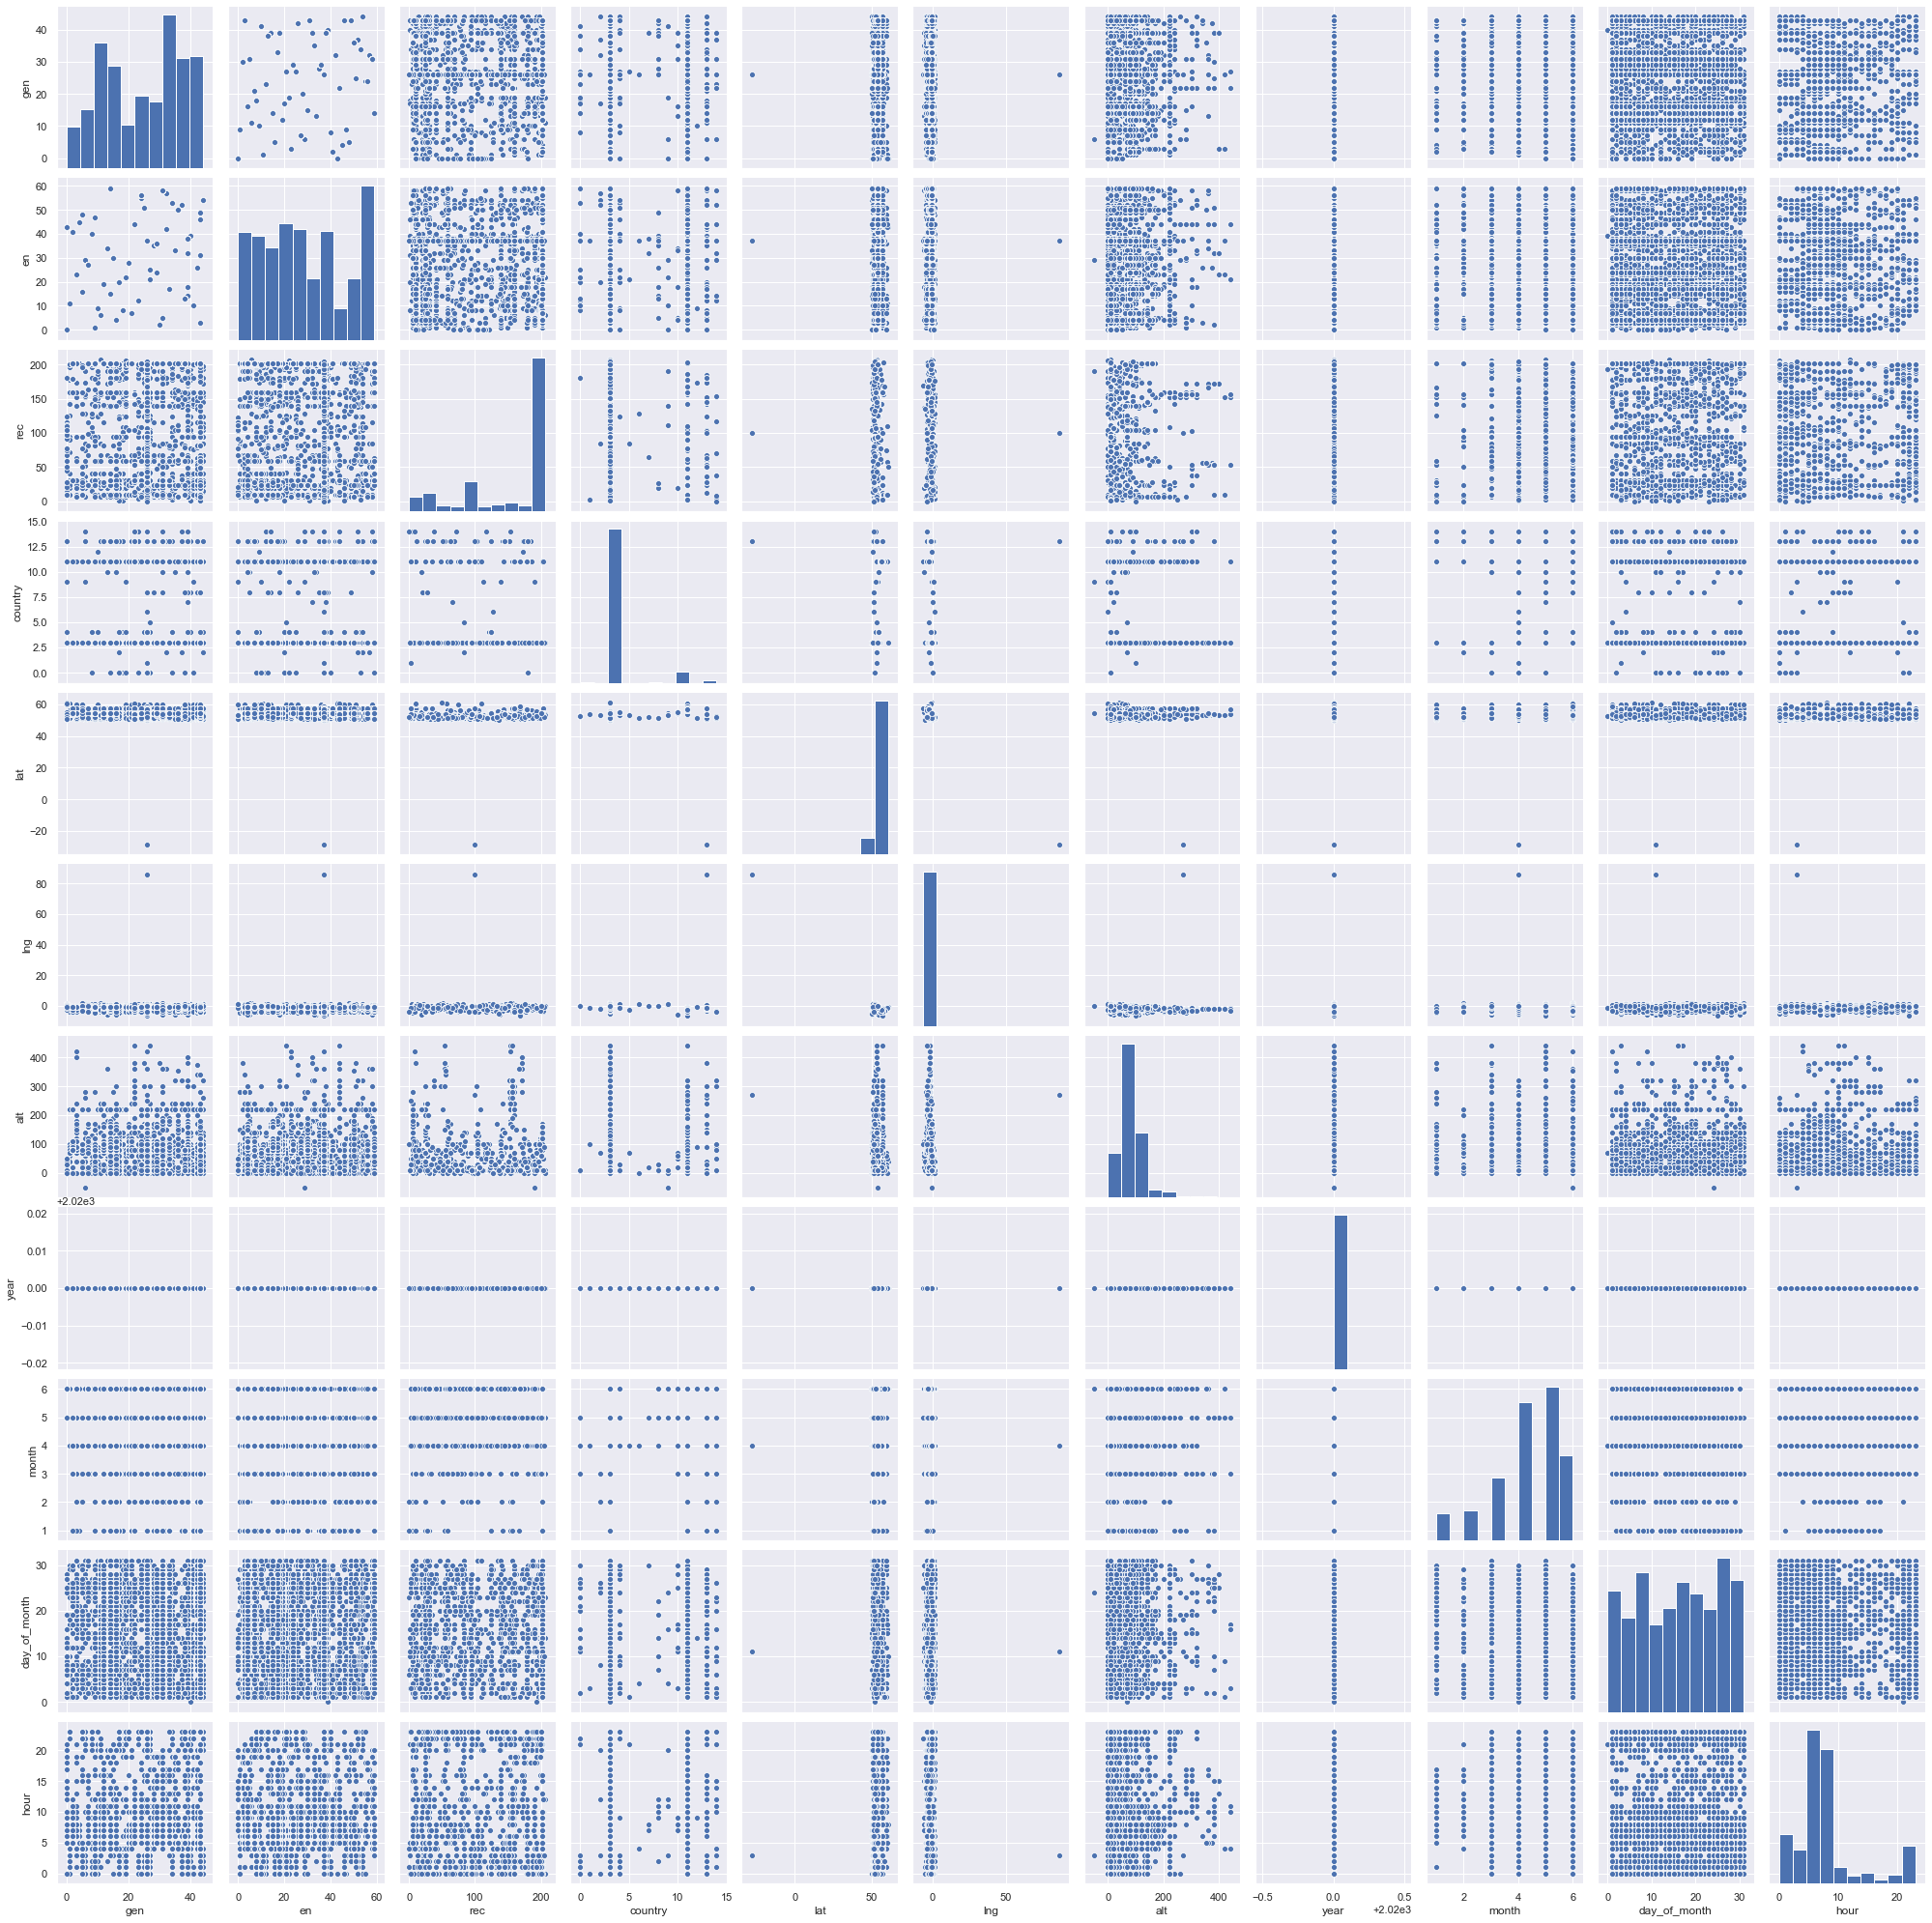

In [63]:
# pairplot
sns.pairplot(df_X,height = 2.5)

# Ploting and Checking values of using Barplot to check how our value look like

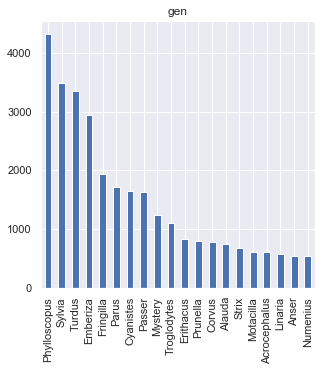

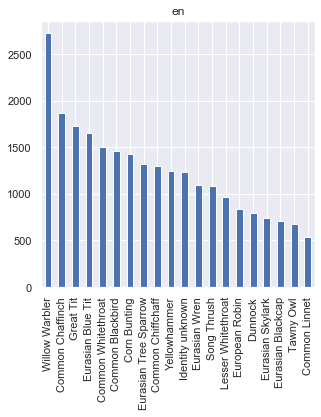

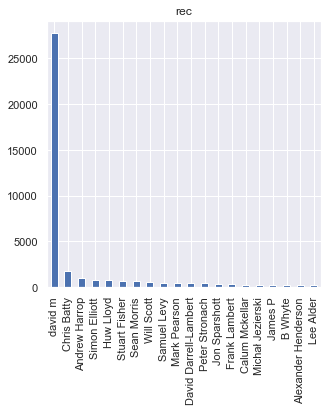

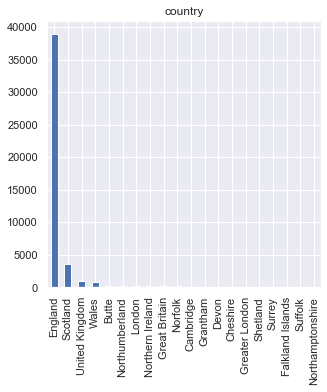

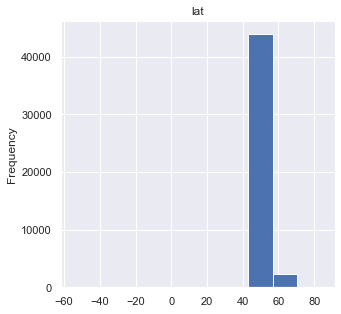

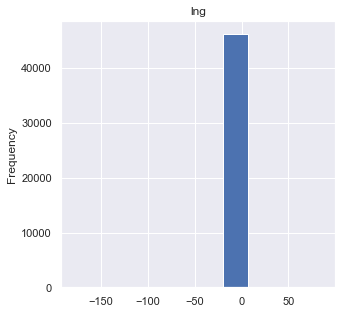

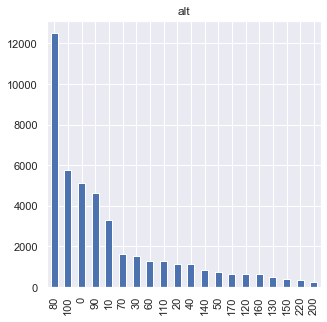

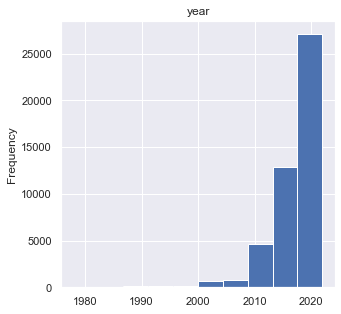

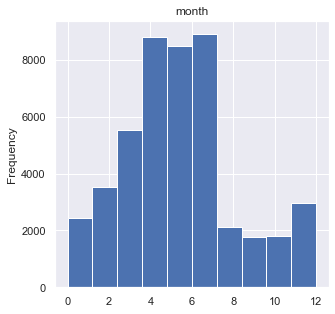

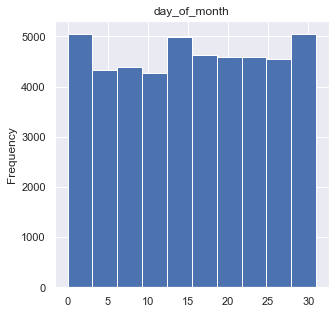

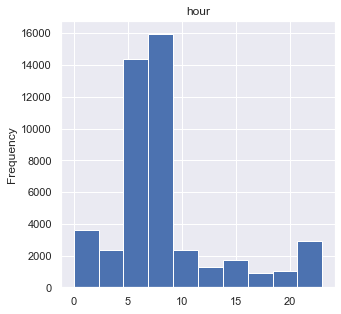

In [58]:
# bar chart and histogram
for column in df_X:
    plt.figure(column, figsize = (4.9,4.9))
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
 # show only the TOP 10 value count in each categorical data
        df[column].value_counts()[:20].plot(kind = 'bar')

# Spliting the Data into Train Test

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df_X, encoded_y, test_size = 0.25, random_state = 42)

In [60]:
print("Train X Shape is : ",X_train.shape)
print("Train Y Shape is : ",y_train.shape)
print("Test X Shape is : ",X_test.shape)
print("Test Y Shape is : ",y_test.shape)

Train X Shape is :  (3684, 11)
Train Y Shape is :  (3684,)
Test X Shape is :  (1229, 11)
Test Y Shape is :  (1229,)


In [61]:
accuracy_scores=np.zeros(5)

# 1-Logistic Regression

In [62]:
parameters = {'C':np.arange(10,61,10), 'penalty':['l2','l1']}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [64]:
accuracy_scores [0] = accuracy_score(y_true=y_test, y_pred=y_pred)*100
print("Accuracy using Logistic Regression : ", accuracy_scores[0])

Accuracy using Logistic Regression :  46.053702196908056


## Confusion Matrix and Classification Report of Logistic Regression


In [66]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         9
           2       0.00      0.00      0.00        14
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        22
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00        15
           9       0.00      0.00      0.00        22
          10       0.00      0.00      0.00        12
          11       0.51      0.93      0.66        86
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00        23
          14       0.71      0.96      0.81        73
          15       0.00      0.00      0.00        12
          16       0.00      0.00      0.00         6
    

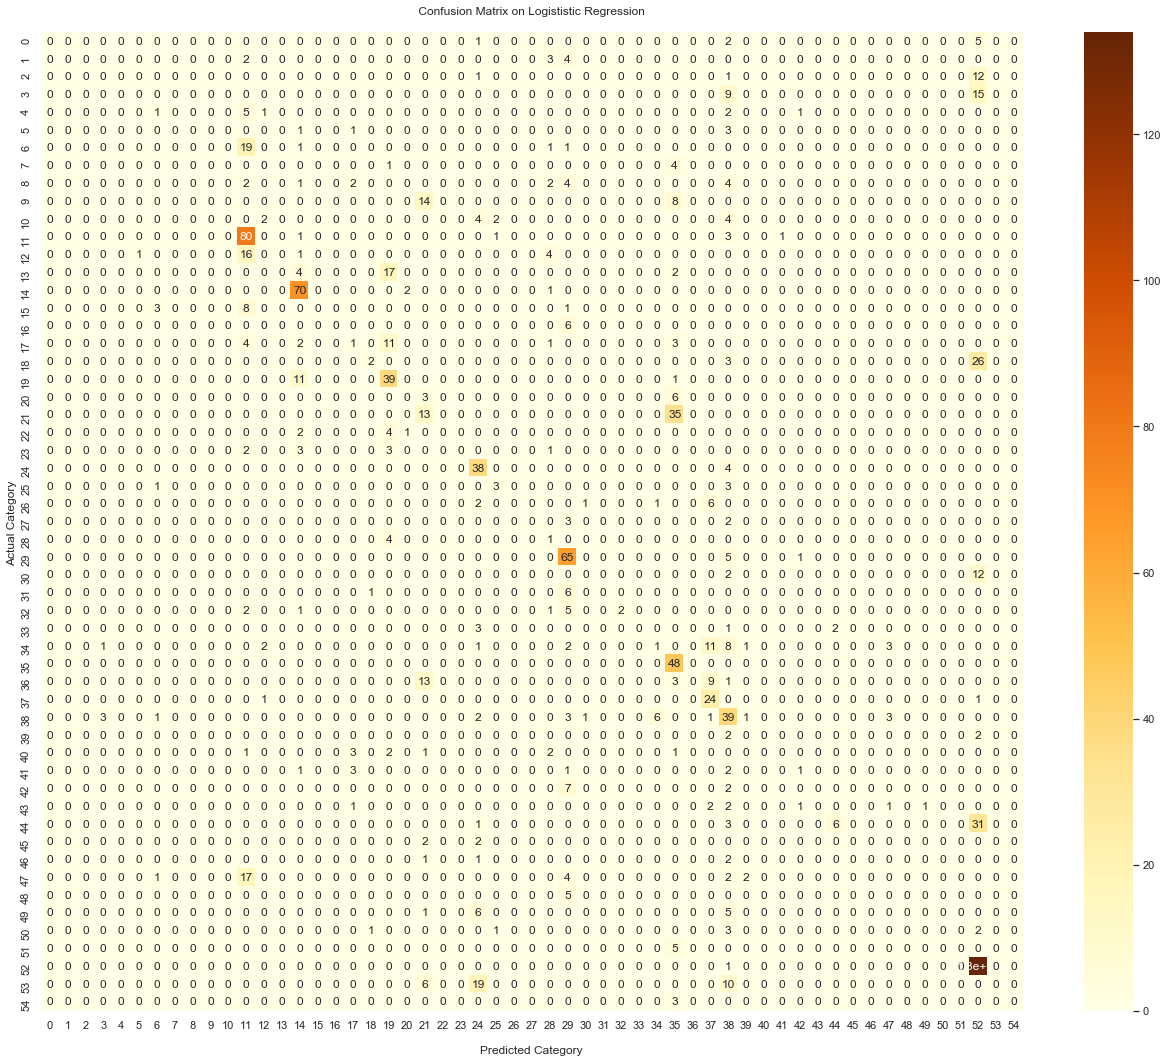

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 18))
ax = sns.heatmap(result, annot=True, cmap='YlOrBr')
ax.set_title(' Confusion Matrix on Logististic Regression \n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');
## Display the visualization of the Confusion Matrix.
plt.show()

# 2- K Nearest Neighbors

In [72]:
from sklearn import metrics

In [68]:
# try K=1 through K=25 and record testing accuracy
k_range = range(5, 26,5)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7379983726606998, 0.694060211554109, 0.6712774613506917, 0.6574450772986168, 0.6574450772986168]


Text(0, 0.5, 'Testing Accuracy')

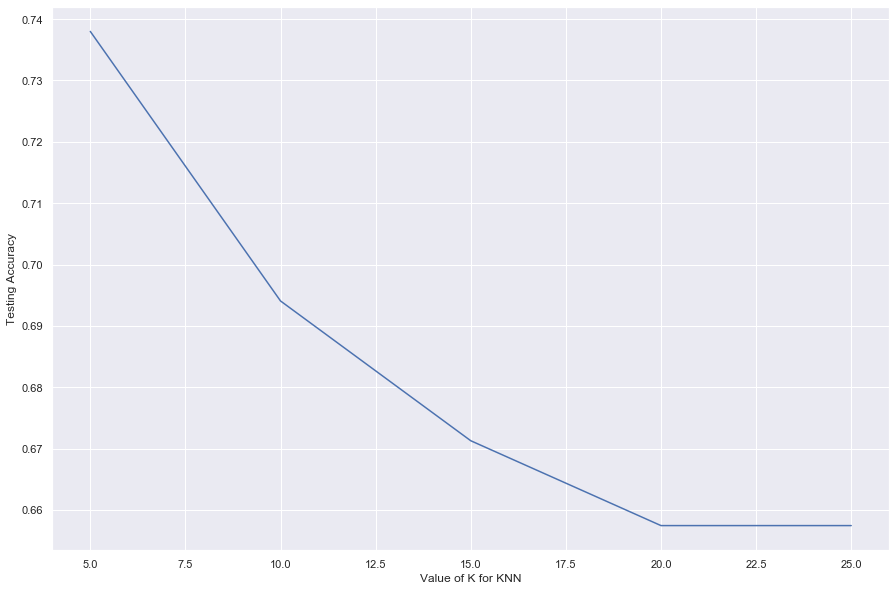

In [69]:
# plot the relationship between K and testing accuracy

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [70]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_scores[1]=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy using KNN : ", accuracy_scores[1])

Accuracy using KNN :  73.79983726606997


##  Confusion Matrix and Classification Report on KNN


In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.12      0.09         8
           1       0.00      0.00      0.00         9
           2       0.36      0.29      0.32        14
           3       0.41      0.38      0.39        24
           4       1.00      0.20      0.33        10
           5       0.00      0.00      0.00         5
           6       0.63      0.86      0.73        22
           7       0.33      0.20      0.25         5
           8       0.29      0.40      0.33        15
           9       0.50      0.68      0.58        22
          10       0.80      0.33      0.47        12
          11       0.92      0.90      0.91        86
          12       0.67      0.82      0.73        22
          13       0.90      0.78      0.84        23
          14       0.92      0.96      0.94        73
          15       0.71      0.83      0.77        12
          16       0.46      1.00      0.63         6
    

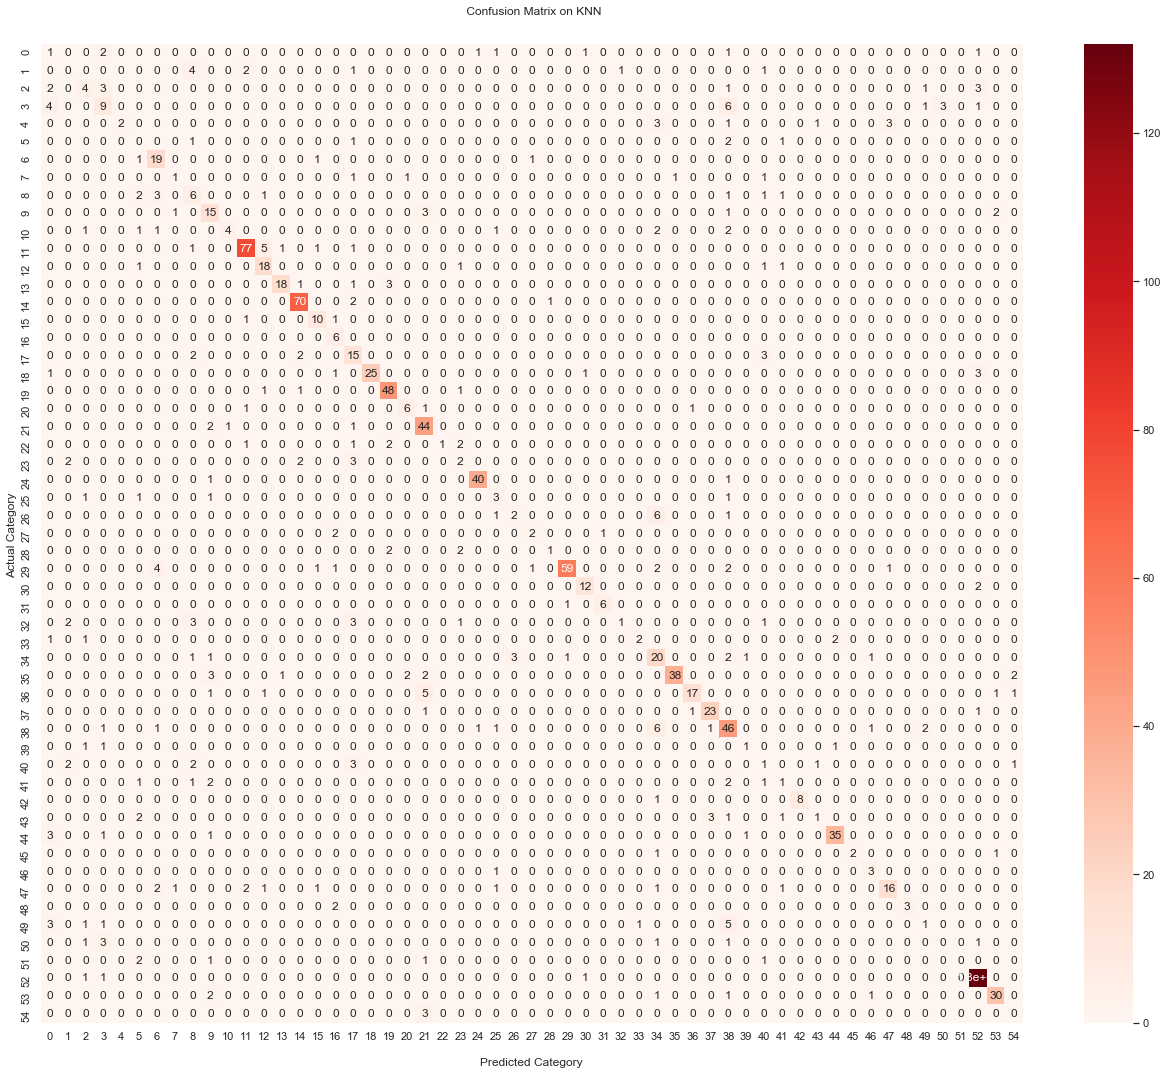

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 18))
ax = sns.heatmap(result, annot=True, cmap='Reds')
# ax.set(rc={"figure.figsize":(15, 15)})
ax.set_title(' Confusion Matrix on KNN\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');
## Display the visualization of the Confusion Matrix.
plt.show()

# 3- Random Forest

In [75]:
# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[2]))

Random Forest Classifier accuracy: 98.29129373474369%


## Confusion Matrix and Classification Report of Random Forest


In [76]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, prediction)
result1 = classification_report(y_test, prediction)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        24
           4       1.00      0.70      0.82        10
           5       0.80      0.80      0.80         5
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00         5
           8       1.00      0.93      0.97        15
           9       0.88      1.00      0.94        22
          10       1.00      0.67      0.80        12
          11       1.00      1.00      1.00        86
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        23
          14       0.99      1.00      0.99        73
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00         6
    

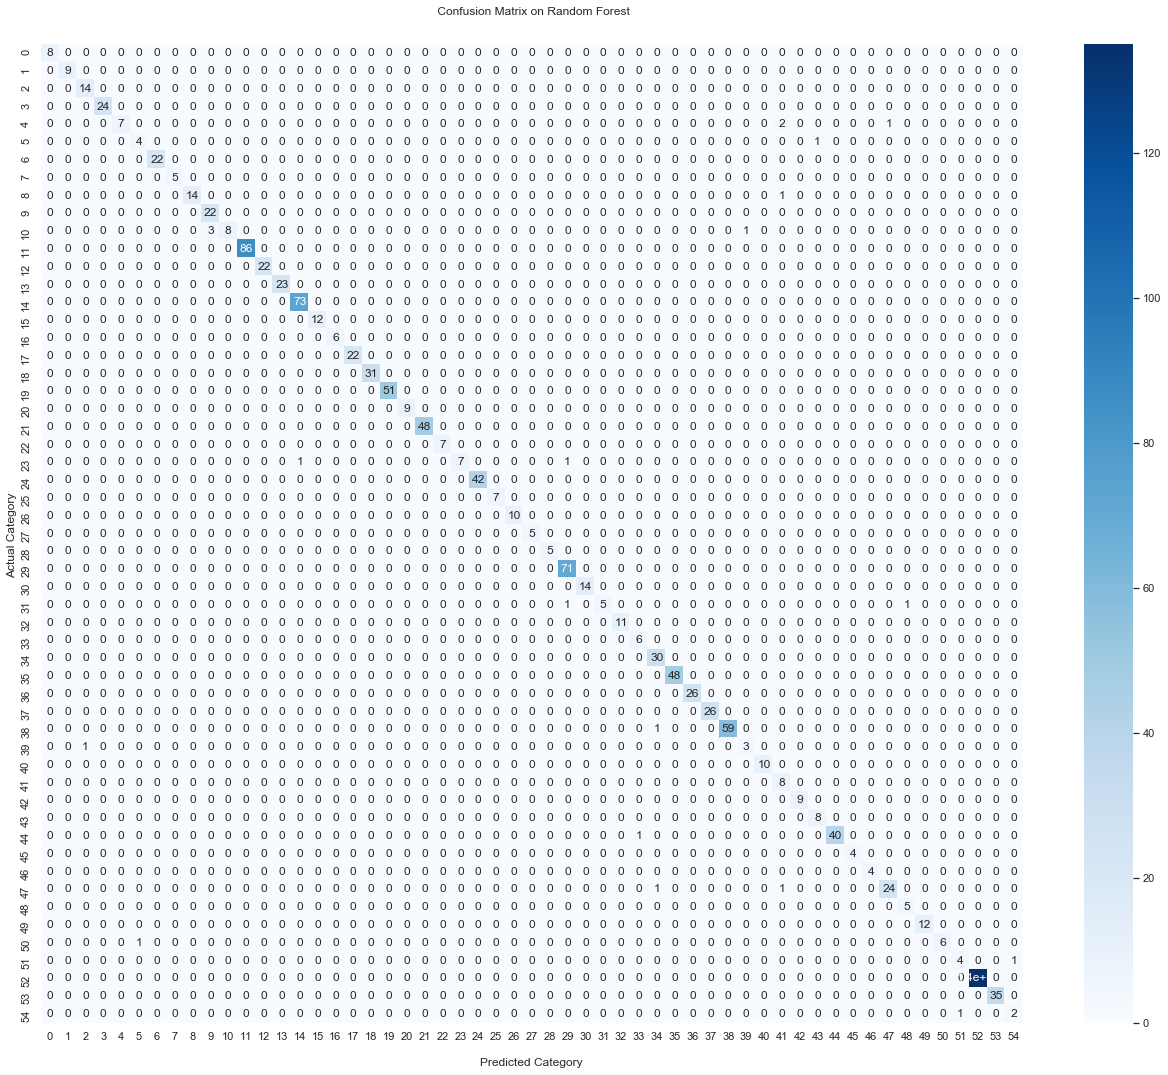

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 18))
ax = sns.heatmap(result, annot=True, cmap='Blues')
ax.set_title(' Confusion Matrix on Random Forest\n\n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');
## Display the visualization of the Confusion Matrix.
plt.show()

# 4- SVM

In [78]:
# SVM
# Normalize the Predictor(Feature Set) for SVM training
# Seperating Predictors and Outcome values from train and test sets

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Scaling the Train and Test feature set 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (3684, 11)
Dimension of Test set (1229, 11) 



In [82]:
# Seperating Predictors and Outcome values from train and test sets
X_train = X_train
Y_train_label = y_train
X_test = X_test
Y_test_label = y_test

# Dimension of Train and Test set 
print("Dimension of Train set",X_train.shape)
print("Dimension of Test set",X_test.shape,"\n")

# Transforming non numerical labels into numerical labels

encoder = preprocessing.LabelEncoder()

# encoding train labels 
encoder.fit(Y_train_label)
Y_train = encoder.transform(Y_train_label)

# encoding test labels 
encoder.fit(Y_test_label)
Y_test = encoder.transform(Y_test_label)

#Total Number of Continous and Categorical features in the training set
num_cols = X_train._get_numeric_data().columns
print("Number of numeric features:",num_cols.size)
#list(set(X_train.columns) - set(num_cols))


names_of_predictors = list(X_train.columns.values)

# Scaling the Train and Test feature set 

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Dimension of Train set (3684, 11)
Dimension of Test set (1229, 11) 

Number of numeric features: 11


In [80]:
# Hyperparameter tuning using grid search and cross validation
#Libraries to Build Ensemble Model : Random Forest Classifier 
# Create the parameter grid based on the results of random search 
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [81]:
# Training SVM model using radial kernel
# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [85]:
# Confusion Matrix and Accuracy Score
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X_test_scaled)
Y_pred_label = list(le.inverse_transform(Y_pred))

Best score for training data: 0.9769294584390302 

Best C: 1000 

Best Kernel: linear 

Best Gamma: scale 



In [89]:
print("Training set score for SVM: %f" % final_model.score(X_train_scaled , y_train))
print("Testing  set score for SVM: %f" % final_model.score(X_test_scaled  , y_test ))
accuracy_scores[3]=final_model.score(X_test_scaled  , y_test )*100
print("Accuracy using SVM : ", accuracy_scores[3])
svm_model.score

Training set score for SVM: 0.999186
Testing  set score for SVM: 0.989422
Accuracy using SVM :  98.94222945484134


<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

## Confusion Matrix and Classification Report of SVM


In [90]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, Y_pred)
result1 = classification_report(y_test, Y_pred)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       1.00      1.00      1.00         9
           2       0.93      1.00      0.97        14
           3       1.00      1.00      1.00        24
           4       1.00      0.80      0.89        10
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        86
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        73
          15       0.86      1.00      0.92        12
          16       1.00      1.00      1.00         6
    

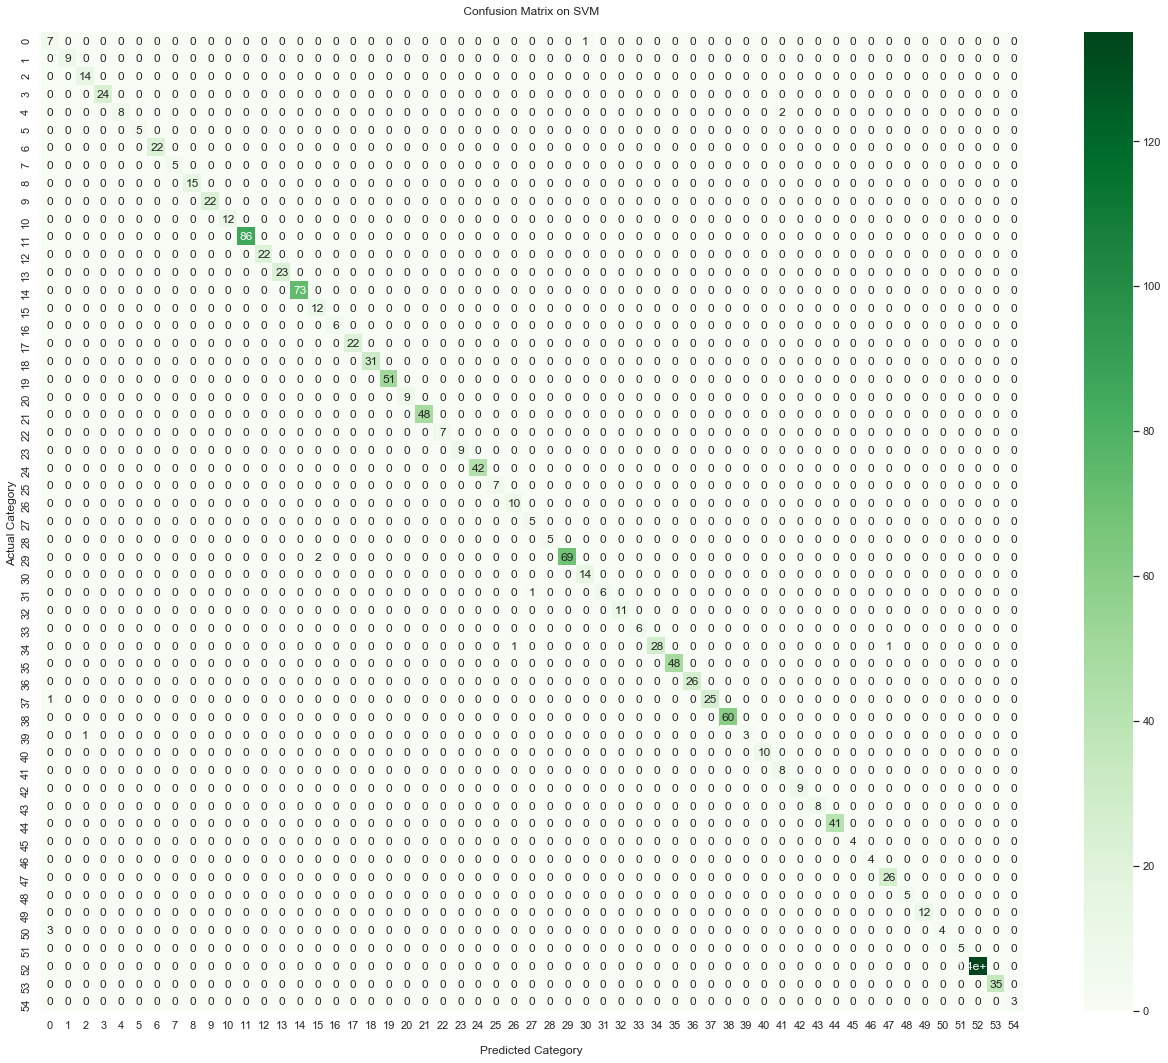

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 18))
ax = sns.heatmap(result, annot=True, cmap='Greens')
ax.set_title(' Confusion Matrix on SVM \n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');
## Display the visualization of the Confusion Matrix.
plt.show()

# 5 -Decision Tree

In [92]:
dtc = DecisionTreeClassifier()
dt=dtc.fit(X_train, y_train)
y_p = dt.predict(X_test)

In [93]:
accuracy_scores[4] = accuracy_score(y_true=y_test, y_pred=y_p)*100
print("Accuracy using Decision Tree: ", accuracy_scores[4])

Accuracy using Decision Tree:  99.91863303498779


## Confusion Matrix and Classification Report of Decision Tree


In [94]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_p)
result1 = classification_report(y_test, y_p)
print("Classification Report:",)
print (result1)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        10
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        22
          10       1.00      1.00      1.00        12
          11       1.00      1.00      1.00        86
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        23
          14       1.00      1.00      1.00        73
          15       1.00      1.00      1.00        12
          16       1.00      1.00      1.00         6
    

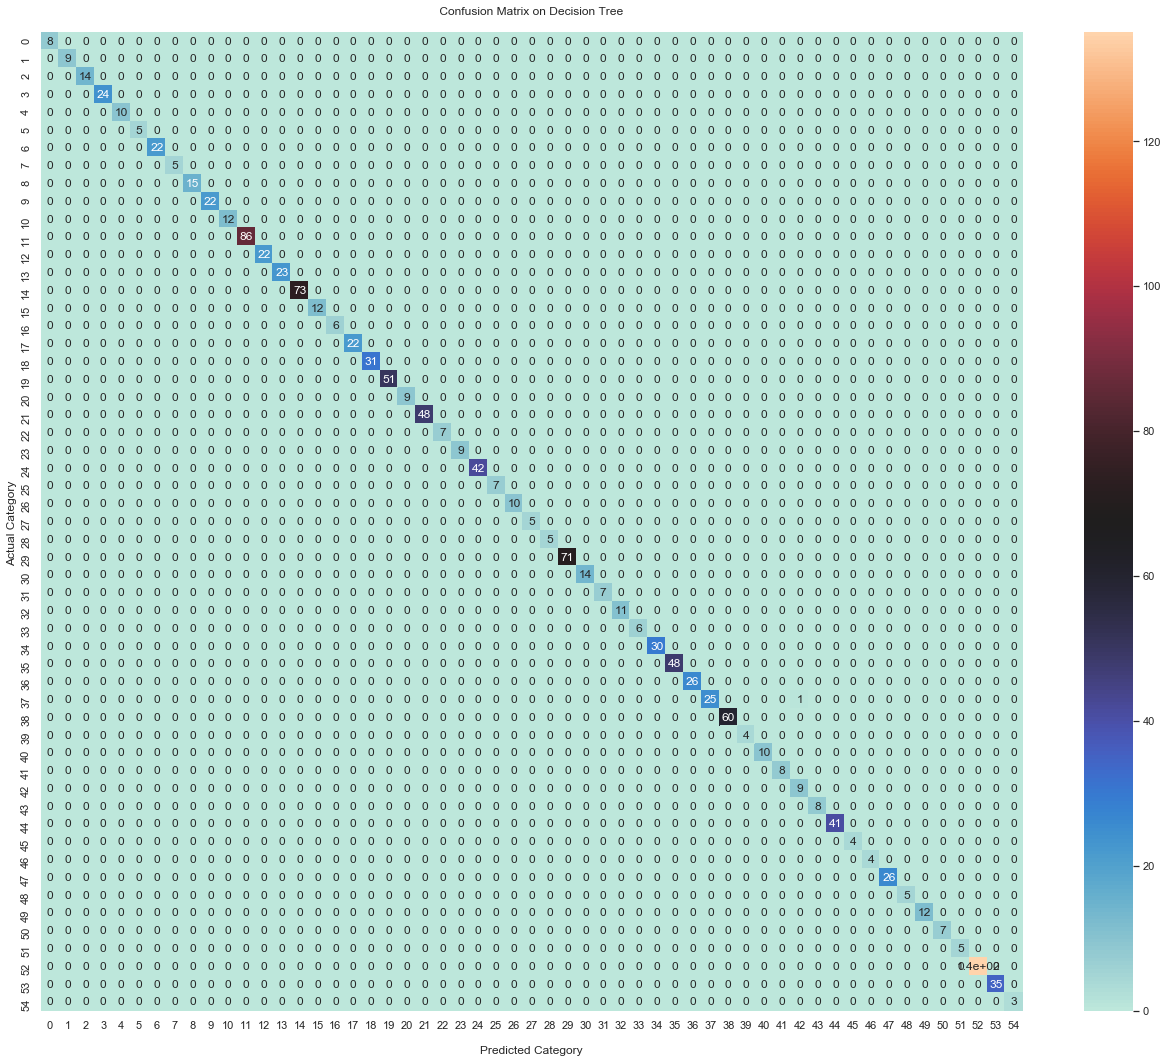

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22, 18))
ax = sns.heatmap(result, annot=True, cmap='icefire')
ax.set_title(' Confusion Matrix on Decision Tree \n');
ax.set_xlabel('\nPredicted Category')
ax.set_ylabel('Actual Category ');
## Display the visualization of the Confusion Matrix.
plt.show()

In [96]:
accuracy_scores

array([46.0537022 , 73.79983727, 98.29129373, 98.94222945, 99.91863303])

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

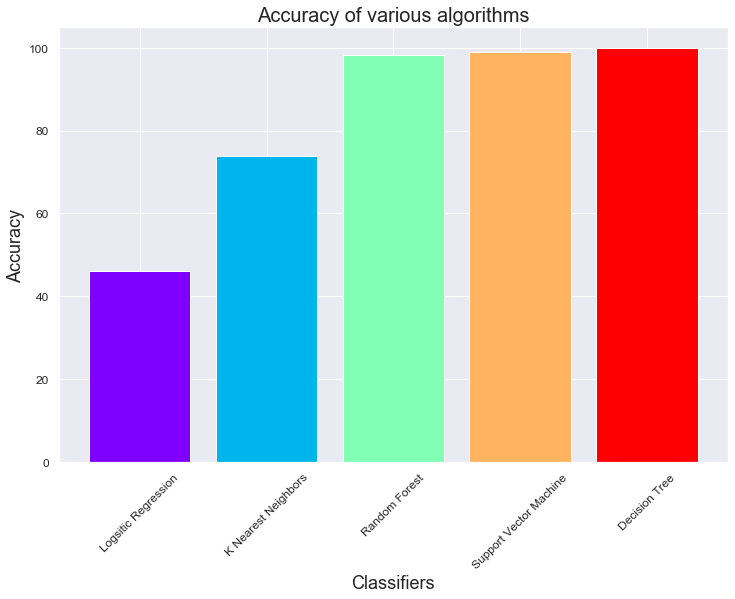

In [98]:
import matplotlib.cm as cm
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 5))
labels = ['Logsitic Regression', 'K Nearest Neighbors', 'Random Forest','Support Vector Machine','Decision Tree']
plt.bar(labels,
 accuracy_scores[:5],
 color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

In [95]:
# machine learning model ends here

# Q3: Detected that there is a specific specie singing at a certain time of the day?



In [99]:
df.sp.value_counts().max()

2723

In [100]:
df_fre = df.groupby(["sp", "session"]).size().reset_index(name="time")

In [101]:
top_collection = df_fre.nlargest(10,'time')
top_collection

sp        session  time
1356   trochilus  Early Morning  2390
347      coelebs  Early Morning  1601
775        major  Early Morning  1458
216    caeruleus  Early Morning  1402
374     communis  Early Morning  1338
222     calandra  Early Morning  1301
865     montanus  Early Morning  1194
325   citrinella  Early Morning  1123
360    collybita  Early Morning  1010
815       merula  Early Morning   970

In [102]:
fig = px.bar(top_collection, x="sp", y="time", color="sp", text="time")
fig.show()

In [104]:
def plot_count(feature, title, df, size=1):
    '''
    Plot count of classes / feature
    param: feature - the feature to analyze
    param: title - title to add to the graph
    param: df - dataframe from which we plot feature's classes distribution 
    param: size - default 1.
    '''
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set1')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  

day values: 1


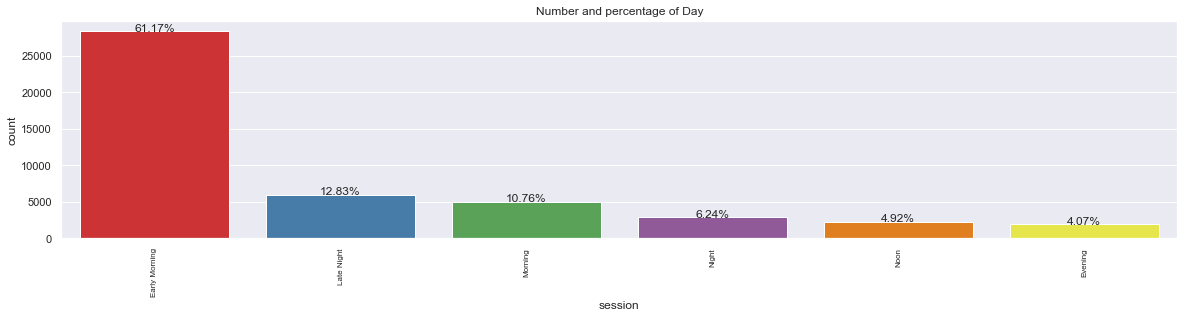

In [105]:
print(f"day values: {top_collection.session.nunique()}")
plot_count("session", "Day", df, size=5)

## Answer/Hypothesis:
**Finding About the specific bird specific specie singing at a certain time of the day.**


We find the that **Trochilus** sings for most occuring specie which sings in  **Early Morning**. As we see from the number and percentage  graphs, **61.17%** of data lies in Early Morning Session while **Trochilus** occured **2390** time in Early Morning.

## -----------------The End-----------------